In [27]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import geopandas as gpd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import requests
sns.set_theme(style="darkgrid")



In [28]:
twenty_twenty_data = pd.read_csv("./2020.csv")
twenty_twenty_data.head()
twenty_twenty_data= twenty_twenty_data.rename(columns={"Country name":"country","Ladder score":"ladder_score","Regional indicator":"regional_indicator","Social support":"social_support","Healthy life expectancy":"healthy_life_expectancy","Freedom to make life choices":"freedom","Perceptions of corruption":"perception_of_corruption","Logged GDP per capita":"GDP" })
twenty_twenty_data.country.replace("Taiwan Province of China","Taiwan",inplace=True)
world_codes = pd.read_csv("https://raw.githubusercontent.com/datasets/country-codes/master/data/country-codes.csv")
world_codes= world_codes.loc[:,["official_name_en","ISO3166-1-Alpha-3"]].copy()
#add lat and long...
twenty_twenty_data


,country,regional_indicator,ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,social_support,healthy_life_expectancy,freedom,Generosity,perception_of_corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,0.082410,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,0.055484,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,-0.072064,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,0.016519,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751


In [29]:
continents = {
    'EU':'Europe',
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
}

def add_continet(row):
    try:
       
        code =country_name_to_country_alpha2(row.country, cn_name_format="default")
        return continents[country_alpha2_to_continent_code(code)]
    except:
        print(row.country)
        return row.regional_indicator.split(" ")[-1]
        

twenty_twenty_data['continent']=twenty_twenty_data.apply(add_continet,axis=1)
twenty_twenty_data.continent

Kosovo
North Cyprus
Hong Kong S.A.R. of China
Congo (Brazzaville)
Palestinian Territories
Congo (Kinshasa)


0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
148    Africa
149    Africa
150    Africa
151    Africa
152      Asia
Name: continent, Length: 153, dtype: object

In [30]:
twenty_twenty_data= twenty_twenty_data.join(world_codes.set_index('official_name_en'), on='country')
twenty_twenty_data.rename(columns={"ISO3166-1-Alpha-3":"code"},inplace=True)
twenty_twenty_data

,country,regional_indicator,ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,social_support,healthy_life_expectancy,freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,continent,code
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900825,0.949172,...,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835,Europe,FIN
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,...,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741,Europe,DNK
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,...,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267,Europe,CHE
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,...,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688,Europe,ISL
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,...,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266,Europe,NOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,Africa,CAF
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,RWA
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,ZWE
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,Africa,SSD


In [31]:
twenty_twenty_data.code.fillna("",inplace=True)
codes=["GBR","USA","CZE","TWN","XK","KOR","BOL","MDA","RUS","CYP","HKG","VNM","CIV","COG","MKD","VEN","LAO","IRN","PSE","COD","SWZ","TZA"] #TODO FILL IN THIS!
#clean this data up....
index=0;
def get_code(row):
    global index
    print(row.code)
    return_val=""
    if row.code == "":
        print("hi")
        print(codes[index])
        return_val=codes[index]
        index+=1
    else:
        return row.code
    return return_val

#twenty_twenty_data.apply(get_code)
twenty_twenty_data["code"]=twenty_twenty_data.apply(get_code, axis=1)
twenty_twenty_data[twenty_twenty_data.code==""]


FIN
DNK
CHE
ISL
NOR
NLD
SWE
NZL
AUT
LUX
CAN
AUS

hi
GBR
ISR
CRI
IRL
DEU

hi
USA

hi
CZE
BEL
ARE
MLT
FRA
MEX

hi
TWN
URY
SAU
ESP
GTM
ITA
SGP
BRA
SVN
SLV

hi
XK
PAN
SVK
UZB
CHL
BHR
LTU
TTO
POL
COL
CYP
NIC
ROU
KWT
MUS
KAZ
EST
PHL
HUN
THA
ARG
HND
LVA
ECU
PRT
JAM

hi
KOR
JPN
PER
SRB

hi
BOL
PAK
PRY
DOM
BIH

hi
MDA
TJK
MNE

hi
RUS
KGZ
BLR

hi
CYP
GRC

hi
HKG
HRV
LBY
MNG
MYS

hi
VNM
IDN

hi
CIV
BEN
MDV

hi
COG
AZE

hi
MKD
GHA
NPL
TUR
CHN
TKM
BGR
MAR
CMR

hi
VEN
DZA
SEN
GIN
NER

hi
LAO
ALB
KHM
BGD
GAB
ZAF
IRQ
LBN
BFA
GMB
MLI
NGA
ARM
GEO

hi
IRN
JOR
MOZ
KEN
NAM
UKR
LBR

hi
PSE
UGA
TCD
TUN
MRT
LKA

hi
COD

hi
SWZ
MMR
COM
TGO
ETH
MDG
EGY
SLE
BDI
ZMB
HTI
LSO
IND
MWI
YEM
BWA

hi
TZA
CAF
RWA
ZWE
SSD
AFG


,country,regional_indicator,ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,social_support,healthy_life_expectancy,freedom,...,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,continent,code


Text(0.5, 1.0, 'Happiness Score By Country')

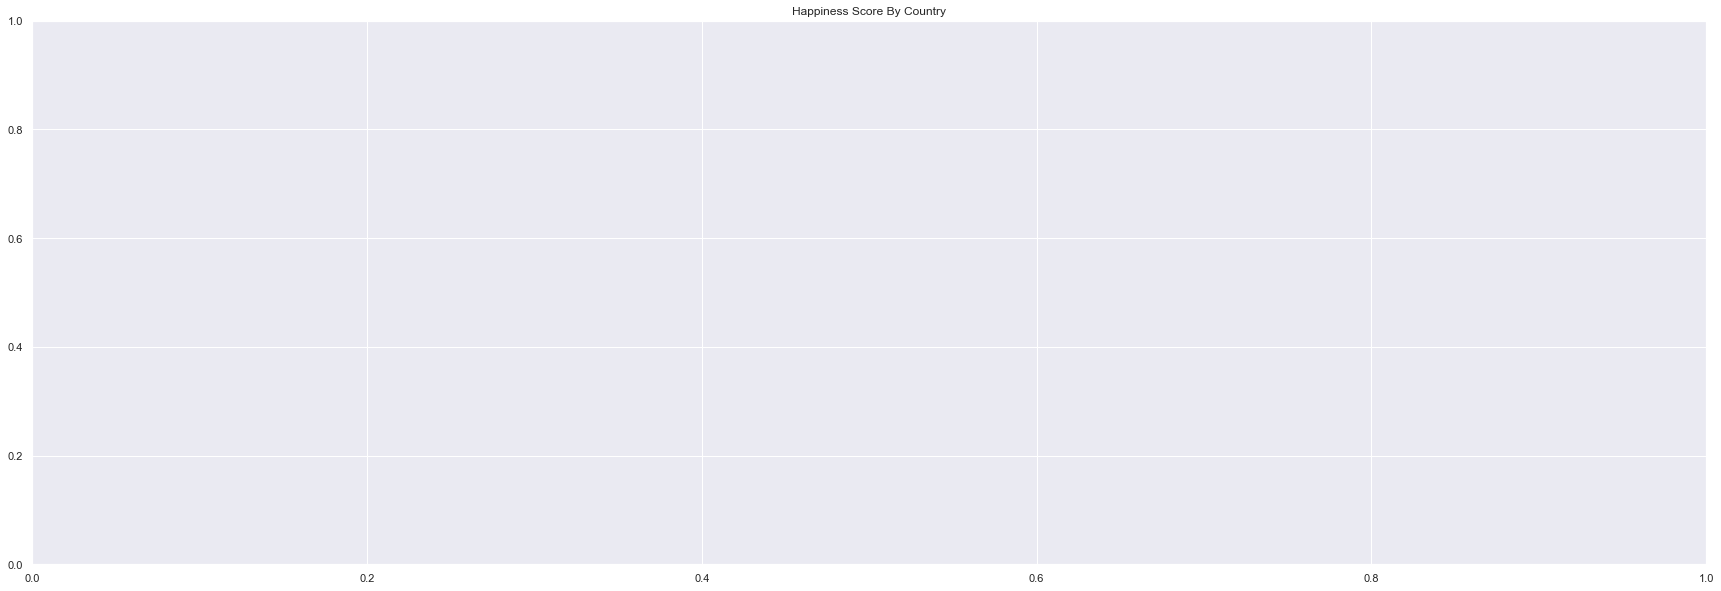

In [32]:
fig, ax = plt.subplots(1, figsize=(30, 10))

plt.title("Happiness Score By Country")
#twenty_twenty_data_gpd.plot('ladder_score', cmap='Greens', linewidth=0.8, ax=ax,legend=True, vmin=0,vmax=10)

In [33]:
fig = go.Figure(data=go.Choropleth(
    locations = twenty_twenty_data['code'],
    z = twenty_twenty_data['ladder_score'],
    text = twenty_twenty_data['country'],
    colorscale = 'Greens',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'World Happiness Score',
))

fig.update_layout(
    title_text='2020 World Happiness',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
)

fig.show()

In [34]:
plt.figure(figsize=(10,6))

             #twenty_twenty_data.loc[:10,'country']twenty_twenty_data.loc[:10,'country']
             #twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]
countries = twenty_twenty_data.loc[:10,'country'].values
fig = go.Figure(data=[
    go.Bar(name='GDP', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]].values.flatten()),
    go.Bar(name='freedom', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Freedom to make life choices"]].values.flatten()),
     go.Bar(name='Generosity', x=countries,  y=twenty_twenty_data.loc[:10,["Explained by: Generosity"]].values.flatten()),
     go.Bar(name='Perception of Corruption', x=countries,  y=twenty_twenty_data.loc[:10,["Explained by: Perceptions of corruption"]].values.flatten()), 
    go.Bar(name='Life Expectency', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Healthy life expectancy"]].values.flatten()),
     go.Bar(name='Social Support', x=countries, y=twenty_twenty_data.loc[:10,["Explained by: Social support"]].values.flatten()),
     go.Bar(name='Distopia', x=countries, y=twenty_twenty_data.loc[:10,["Dystopia + residual"]].values.flatten()),
])
# Change the bar mode
fig.update_layout( title_text="World's Happies Countries",barmode='stack')
fig.show()



<Figure size 720x432 with 0 Axes>

In [76]:
continent_data=twenty_twenty_data.groupby('continent').mean()

plt.figure(figsize=(10,6))

             #twenty_twenty_data.loc[:10,'country']twenty_twenty_data.loc[:10,'country']
             #twenty_twenty_data.loc[:10,["Explained by: Log GDP per capita"]
fig = go.Figure(data=[
    go.Bar(name='GDP', x=continent_data.index, y=continent_data["Explained by: Log GDP per capita"]),
    go.Bar(name='freedom', x=continent_data.index, y=continent_data["Explained by: Freedom to make life choices"].values.flatten()),
     go.Bar(name='Generosity', x=continent_data.index,  y=continent_data["Explained by: Generosity"].values.flatten()),
     go.Bar(name='Perception of Corruption', x=continent_data.index,  y=continent_data["Explained by: Perceptions of corruption"].values.flatten()), 
    go.Bar(name='Life Expectency', x=continent_data.index, y=continent_data["Explained by: Healthy life expectancy"].values.flatten()),
     go.Bar(name='Social Support', x=continent_data.index, y=continent_data["Explained by: Social support"].values.flatten()),
     go.Bar(name='Distopia', x=continent_data.index, y=continent_data["Dystopia + residual"].values.flatten()),
])
# Change the bar mode
fig.update_layout( title_text="World's Happies Countries",barmode='stack')
fig.show()
continent_data

,ladder_score,Standard error of ladder score,upperwhisker,lowerwhisker,GDP,social_support,healthy_life_expectancy,freedom,Generosity,perception_of_corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
continent,,,,,,,,,,,,,,,,,,
Africa,4.436476,0.067416,4.568611,4.304340,8.078822,0.690407,56.302255,0.711727,-0.020644,0.772117,1.972317,0.491615,0.876156,0.399698,0.377727,0.185357,0.105540,2.000388
Asia,5.320217,0.046642,5.411634,5.228799,9.503783,0.813485,65.761960,0.803107,0.021677,0.733740,1.972317,0.933262,1.166860,0.740263,0.487251,0.213346,0.130317,1.648914
Europe,6.341551,0.041499,6.422890,6.260212,10.276437,0.896818,70.116830,0.805448,-0.033103,0.684052,1.972317,1.172735,1.363686,0.897045,0.490056,0.177117,0.162398,2.078517
North America,6.184008,0.068691,6.318642,6.049373,9.400182,0.853239,66.825558,0.849755,-0.005258,0.752448,1.972317,0.901152,1.260756,0.778554,0.543160,0.195532,0.118239,2.386603
Oceania,7.261200,0.040653,7.340880,7.181520,10.610770,0.946987,73.403584,0.925825,0.191029,0.318154,1.972317,1.276357,1.482182,1.015373,0.634334,0.325350,0.398632,2.128956
South America,5.939710,0.052293,6.042205,5.837215,9.477927,0.874400,67.423274,0.817408,-0.116691,0.814078,1.972317,0.925248,1.310736,0.800073,0.504391,0.121834,0.078449,2.198968


<Figure size 720x432 with 0 Axes>

<AxesSubplot:title={'center':'The Happiest Continents in The World'}, ylabel='continent'>

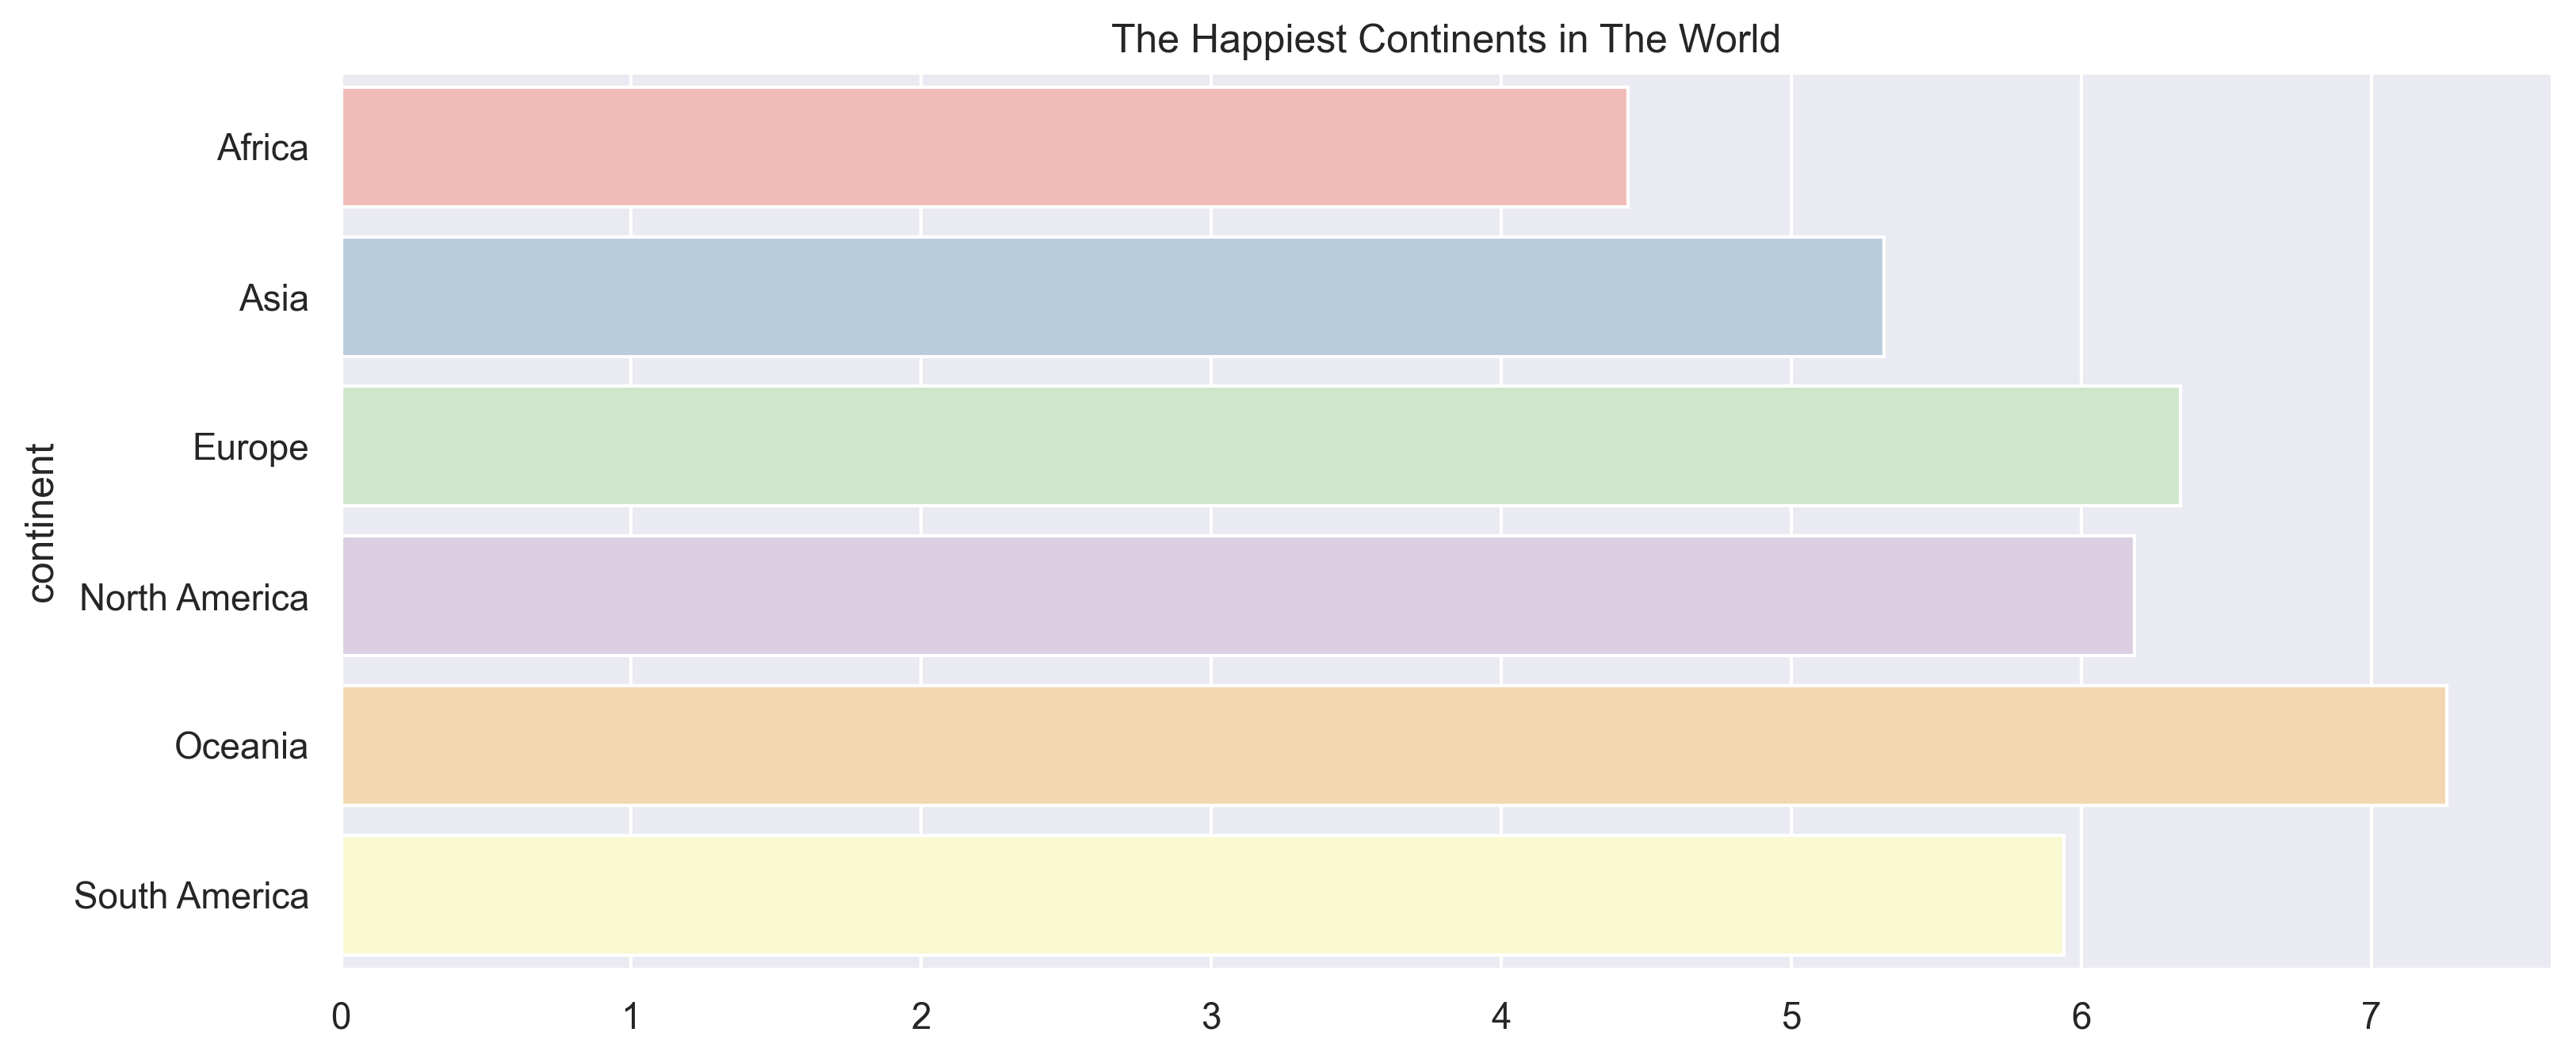

In [36]:
plt.figure(figsize=(12,5),dpi=300)

plt.title("The Happiest Continents in The World")

data=twenty_twenty_data.groupby('continent').ladder_score.sum()/twenty_twenty_data.groupby('continent').ladder_score.count()


#sns.barplot(data=twenty_twenty_data["continent"]., y="country",x="ladder_score")
sns.barplot(y=data.index,x=data.values,palette="Pastel1")


continent
Africa           34.745279
Asia             30.817079
Europe           28.046119
North America     9.781829
Oceania           0.636308
South America     8.140780
Name: perception_of_corruption, dtype: float64


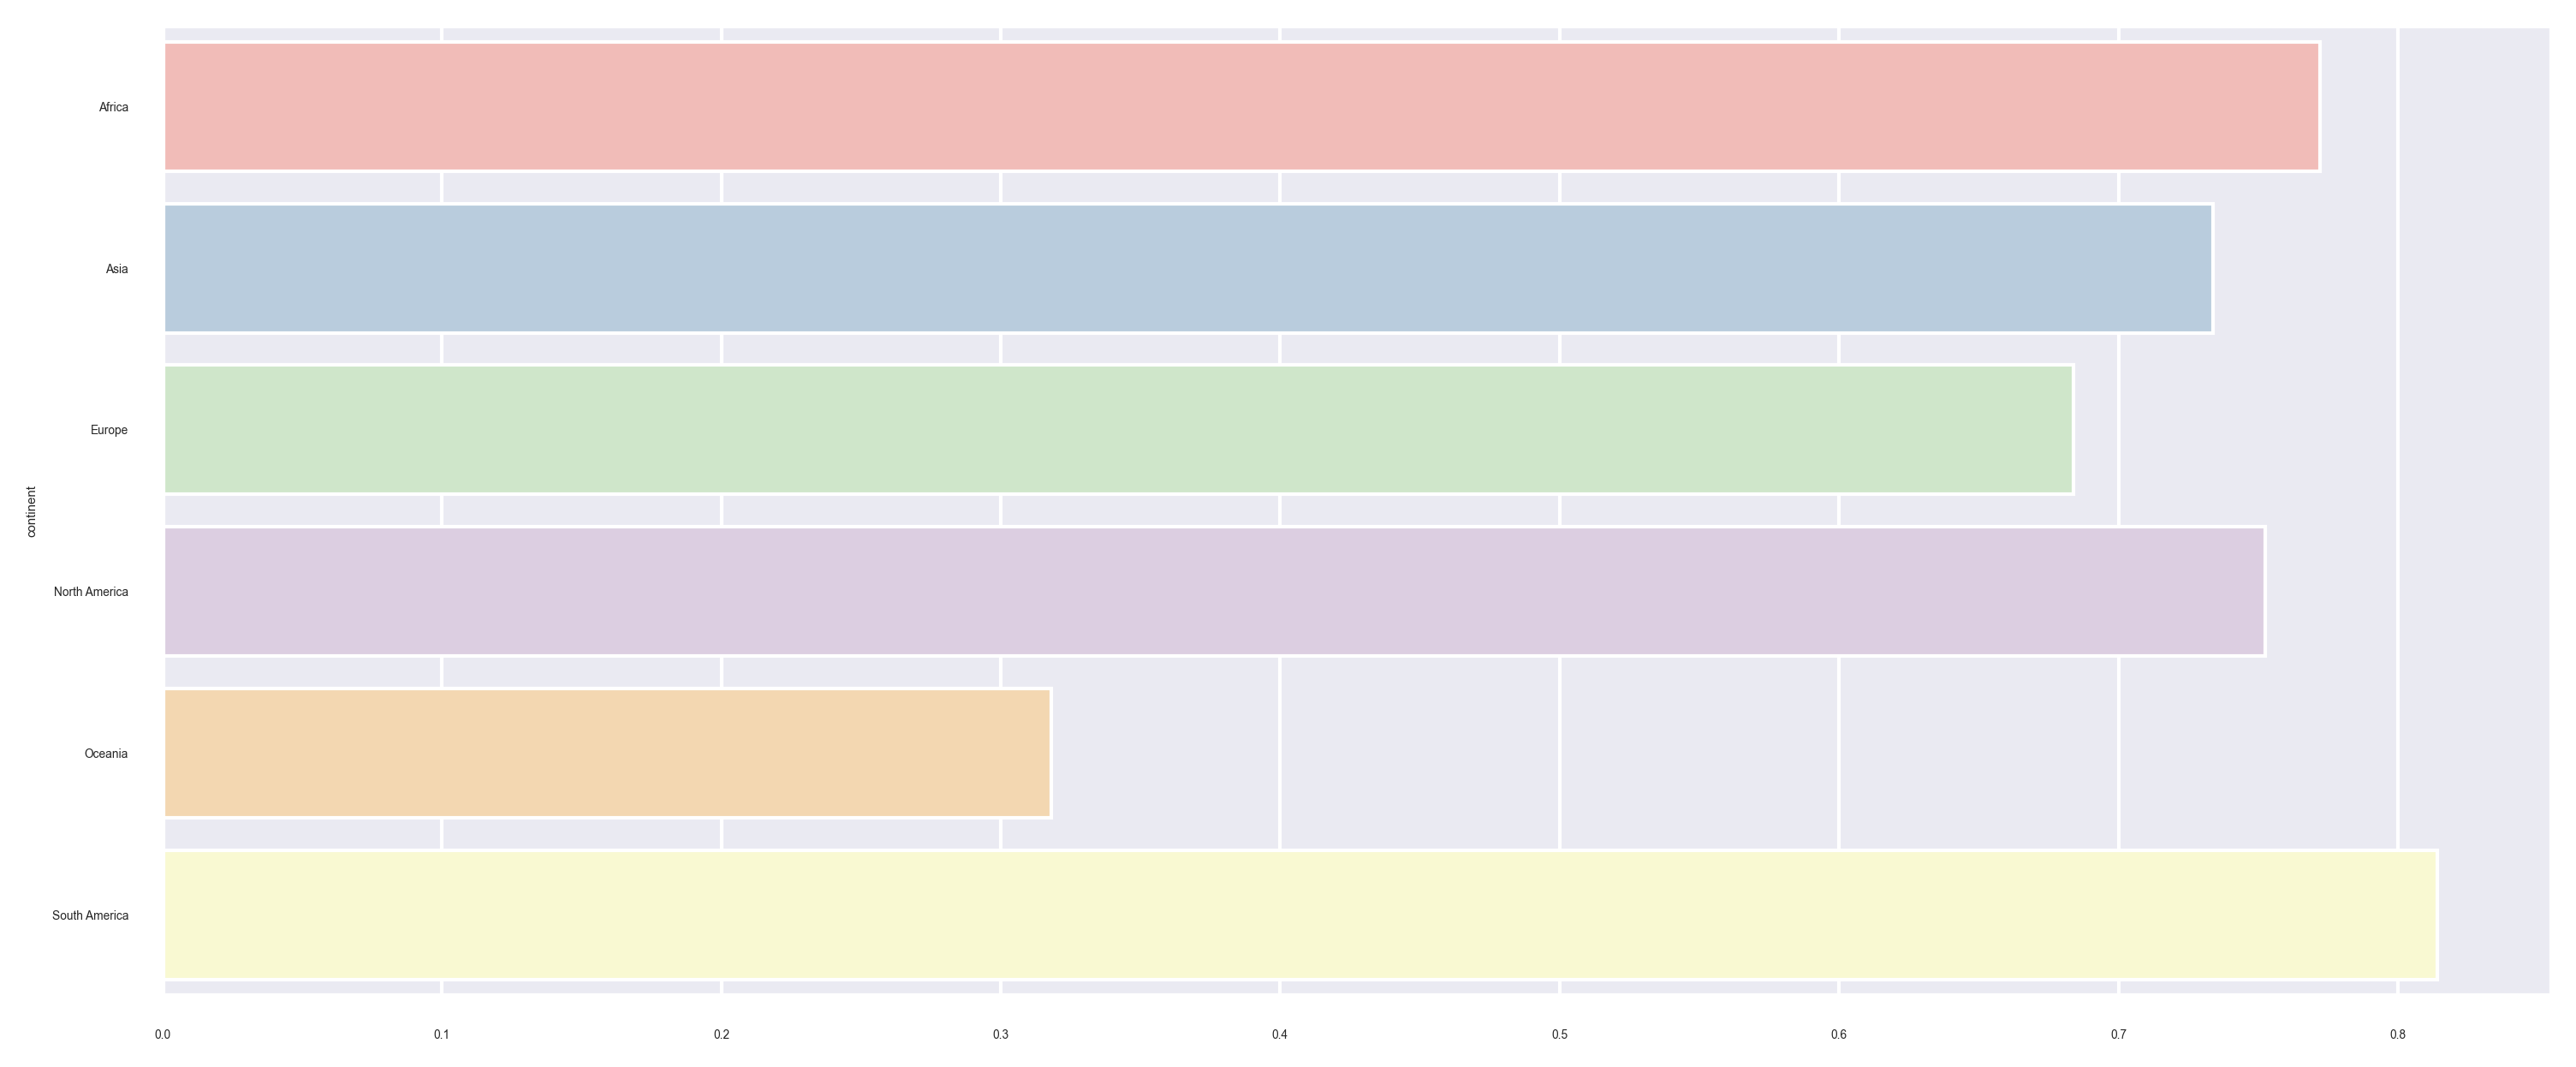

In [55]:
plt.figure(figsize=(12,5),dpi=300)

corruption_data=twenty_twenty_data.groupby('continent').perception_of_corruption.sum()/twenty_twenty_data.groupby('continent').perception_of_corruption.count()
sns.barplot(y=corruption_data.index,x=corruption_data.values,palette="Pastel1")
print(twenty_twenty_data.groupby('continent').perception_of_corruption.sum())
twenty_twenty_data.groupby('continent').perception_of_corruption.count()
sns.barplot(y=corruption_data.index,x=corruption_data.values,palette="Pastel1")

<Figure size 3600x1500 with 0 Axes>

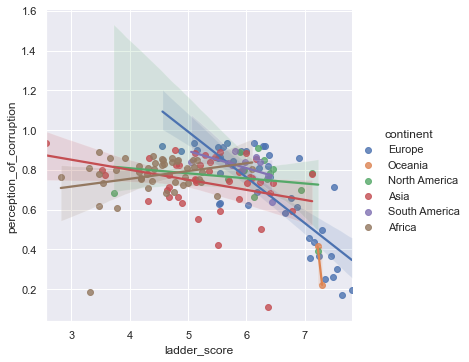

In [38]:
plt.figure(figsize=(12,5),dpi=300)
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="perception_of_corruption",hue="continent")
plt.savefig("fig.png", dpi=500)

<AxesSubplot:ylabel='continent'>

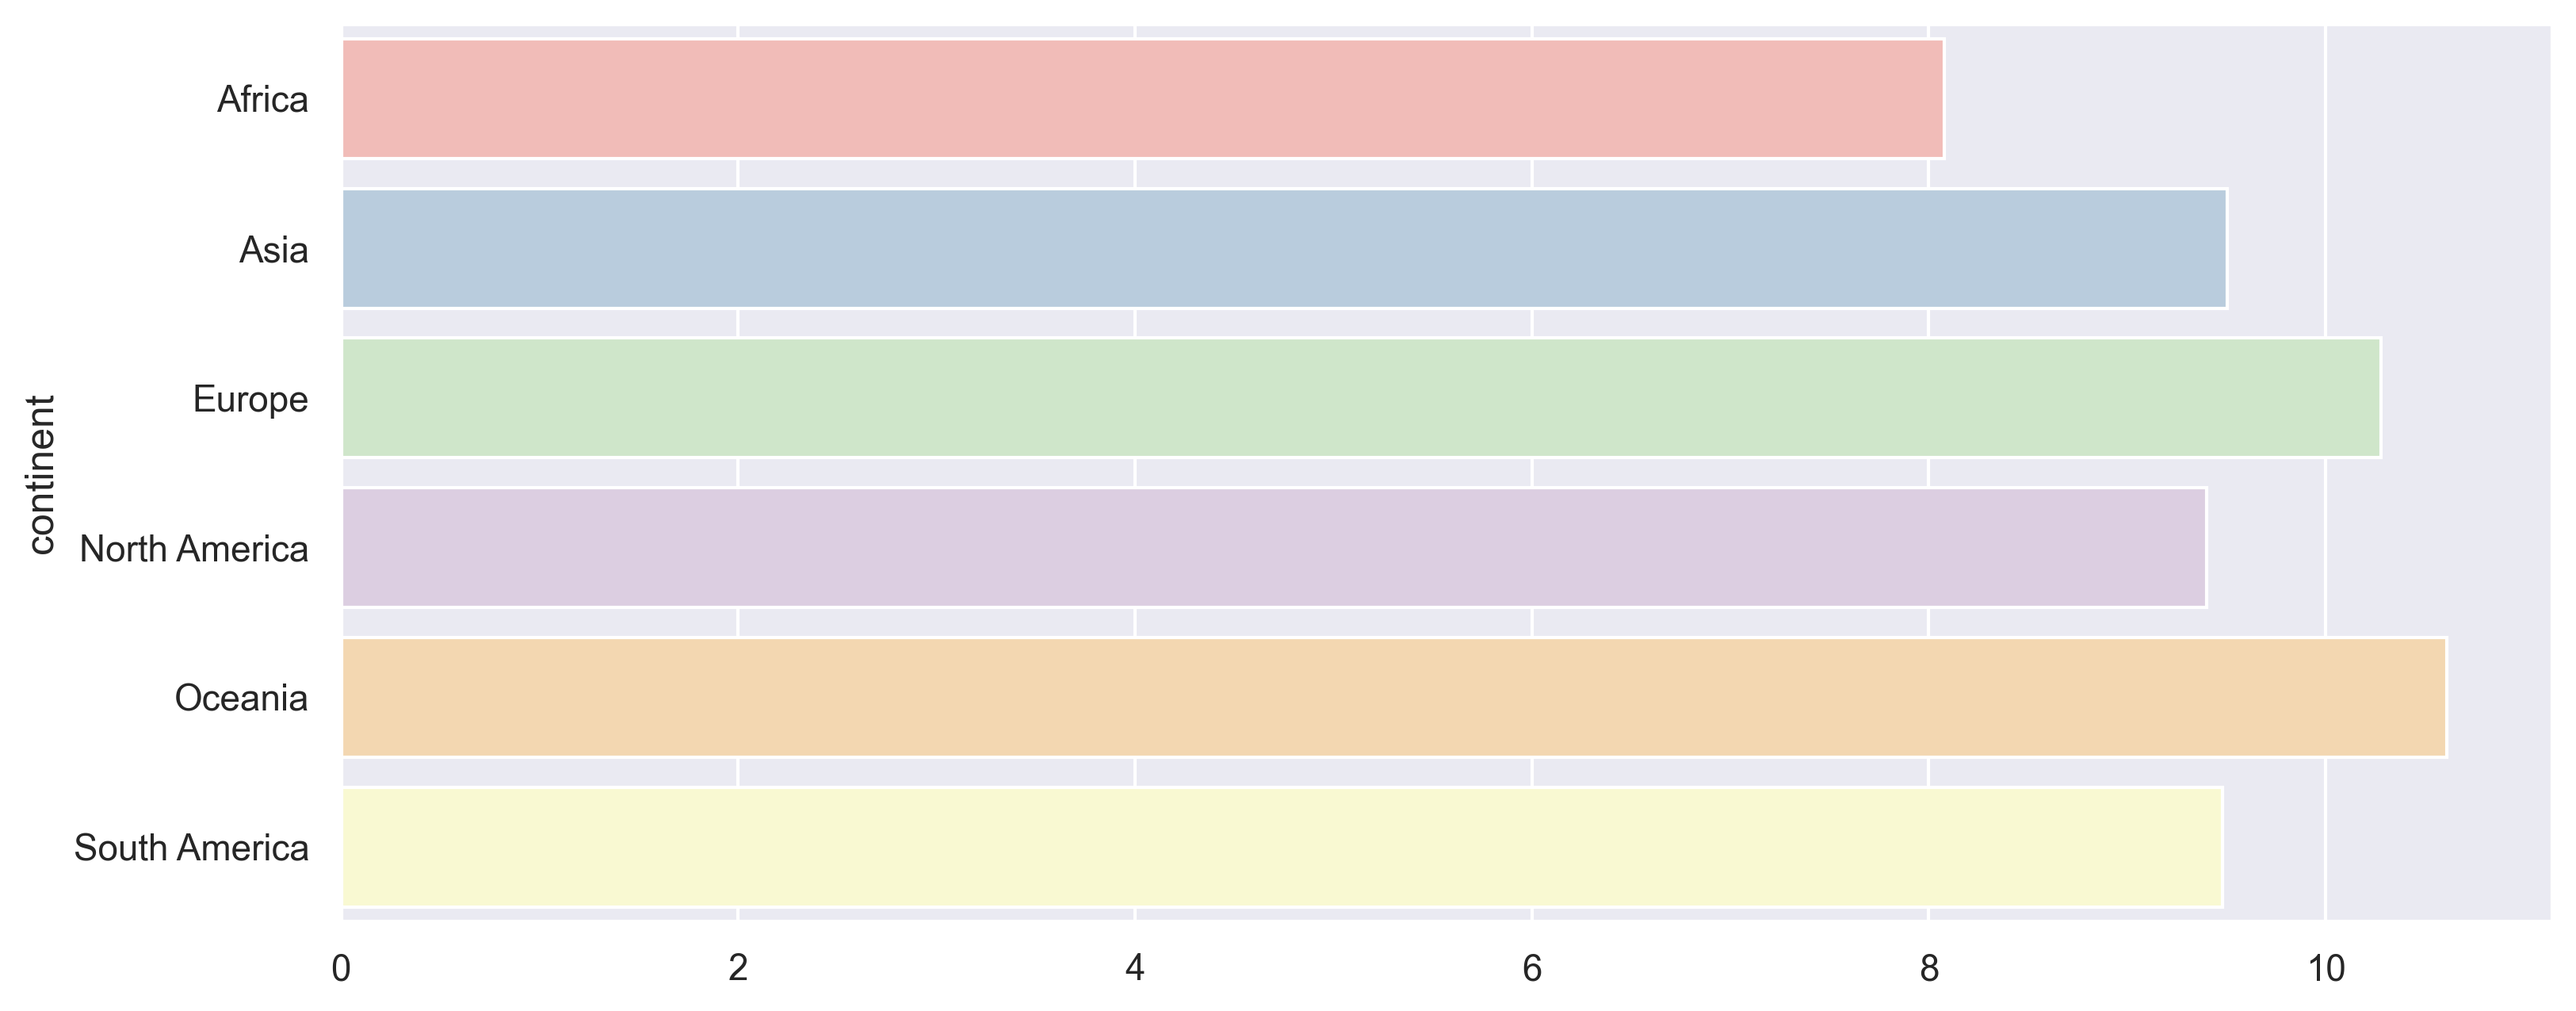

In [39]:
plt.figure(figsize=(12,5),dpi=300)

data=twenty_twenty_data.groupby('continent').GDP.sum()/twenty_twenty_data.groupby('continent').GDP.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")


<Figure size 864x504 with 0 Axes>

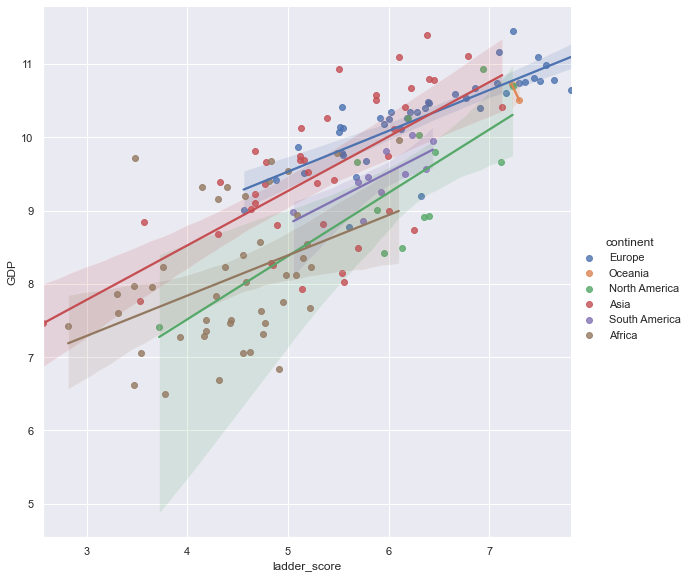

In [40]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="GDP",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

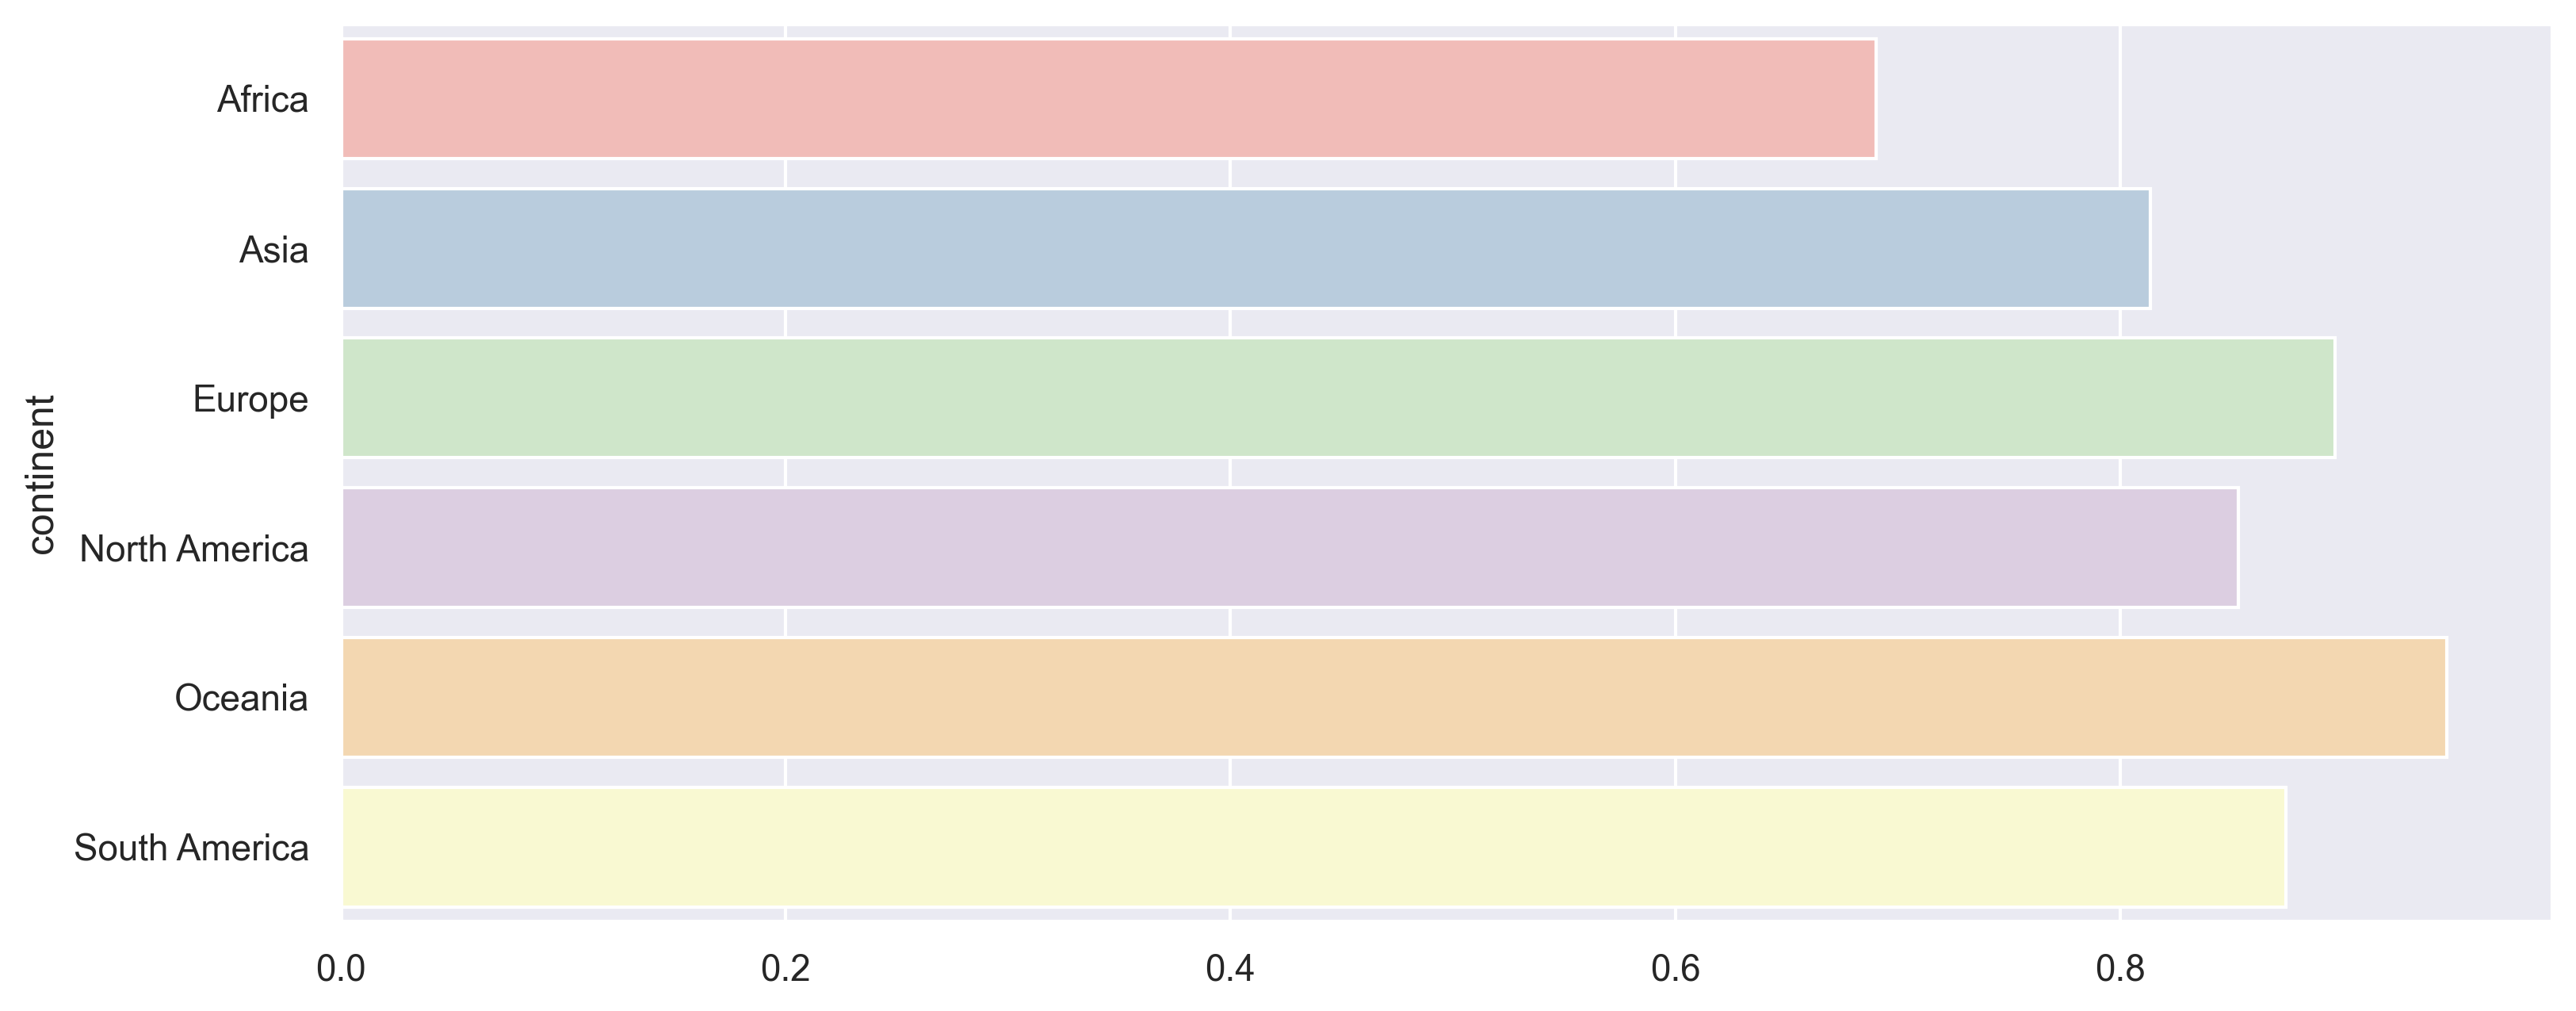

In [41]:
plt.figure(figsize=(12,5),dpi=300)


data=twenty_twenty_data.groupby('continent').social_support.sum()/twenty_twenty_data.groupby('continent').social_support.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")



<Figure size 864x504 with 0 Axes>

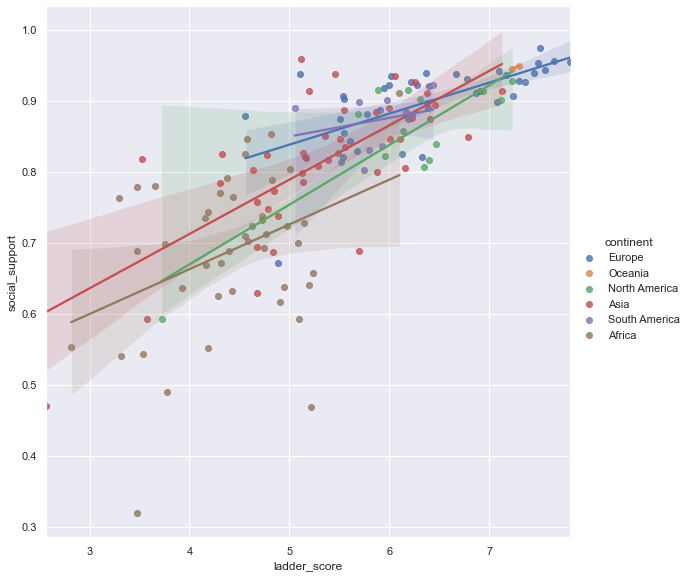

In [42]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="social_support",hue="continent", height=8)

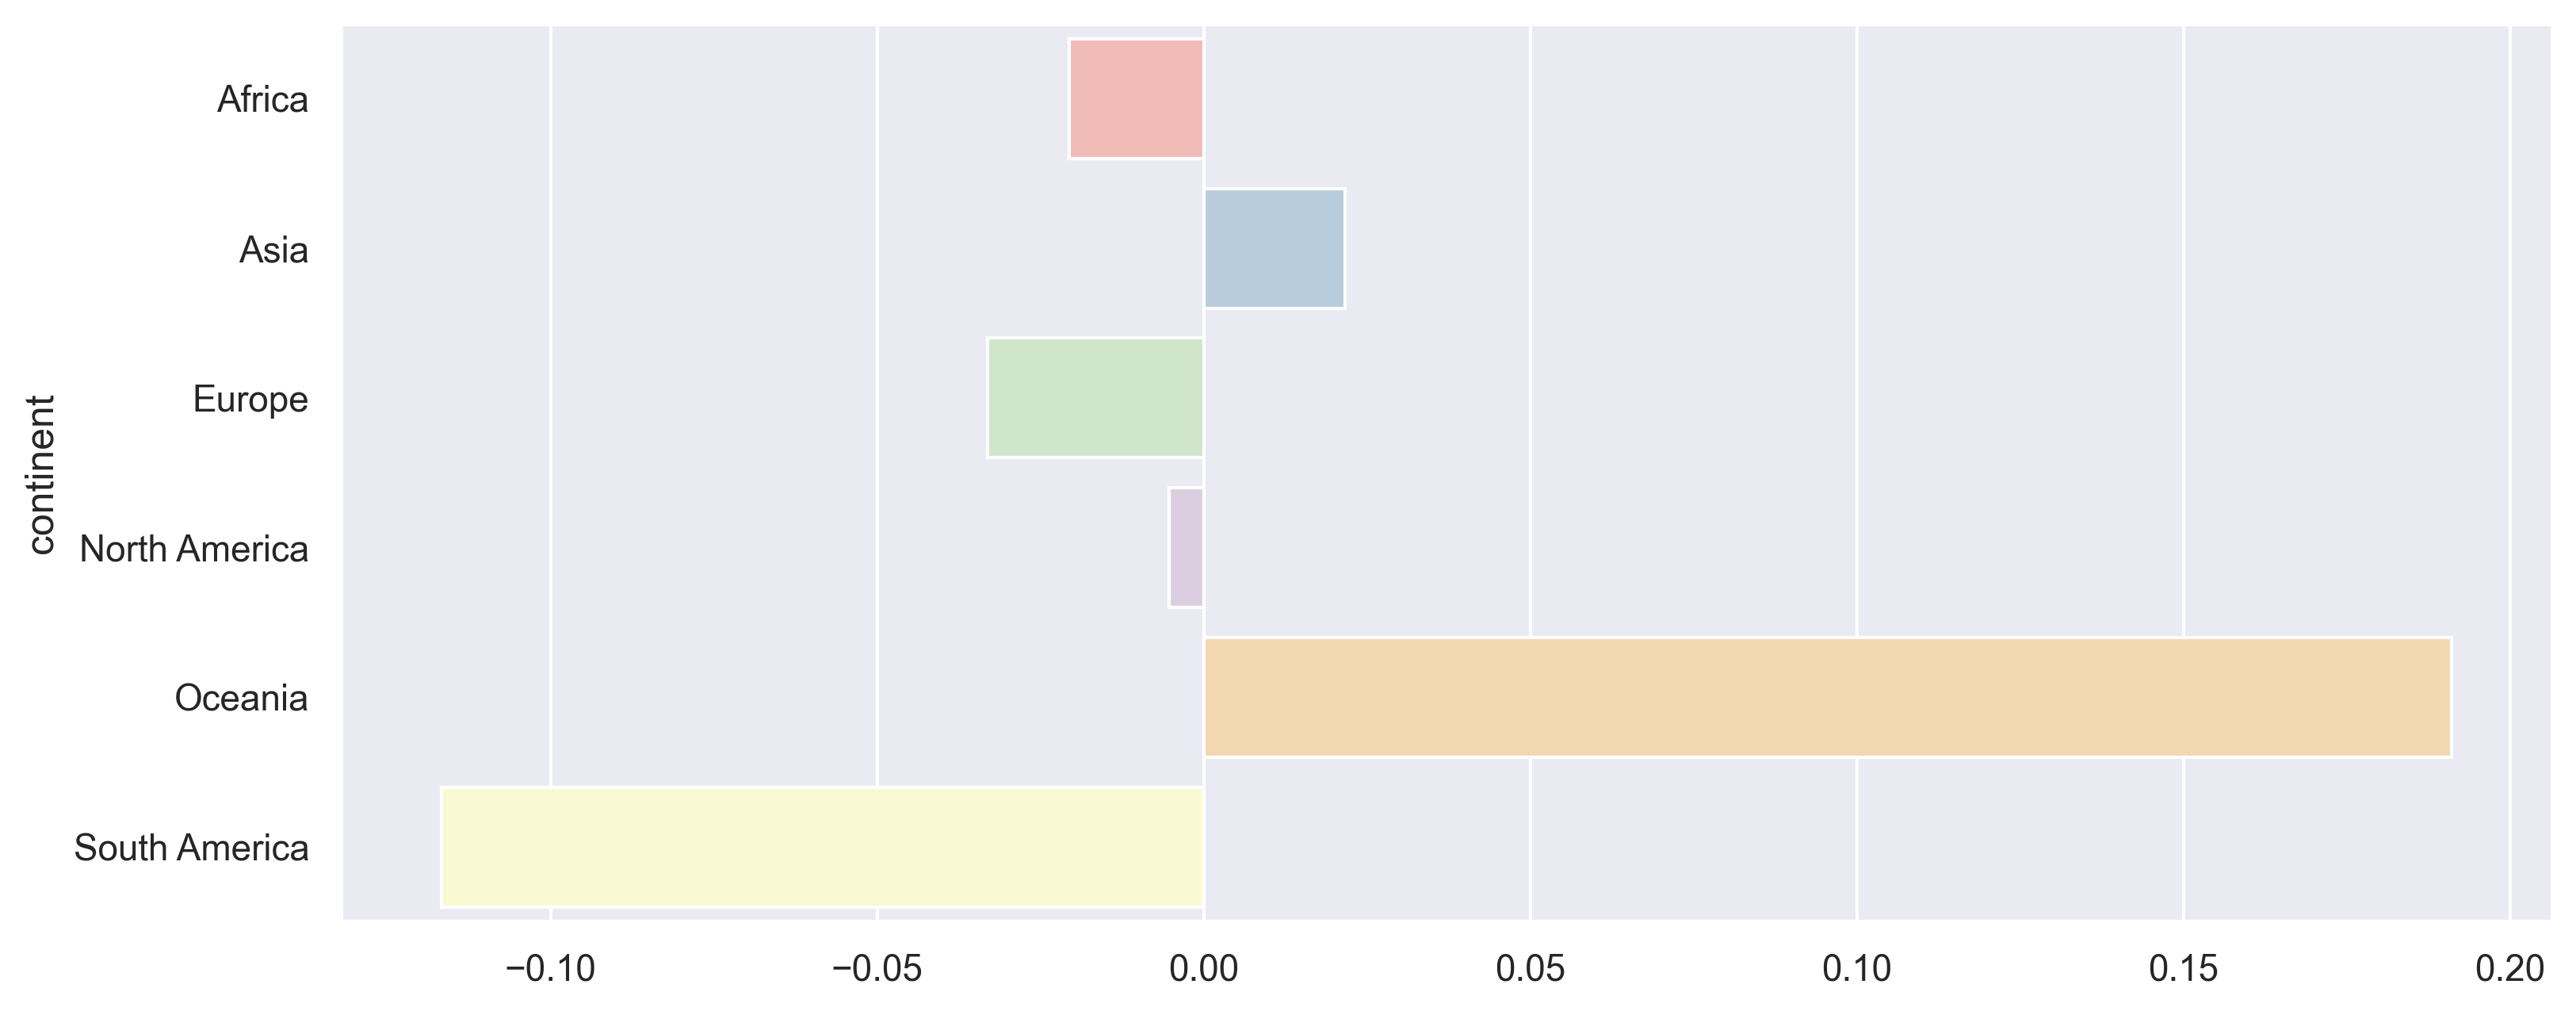

In [43]:
plt.figure(figsize=(12,5),dpi=300)


data=twenty_twenty_data.groupby('continent').Generosity.sum()/twenty_twenty_data.groupby('continent').Generosity.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")

fig = px.bar(data,y=data.index,x=data.values,orientation="h")
fig.update_traces(marker_color=["#948C5F","#D19480","#CB4F34","#2B506B","#82BAA7","#7B92A6"])
fig.show()


<Figure size 864x504 with 0 Axes>

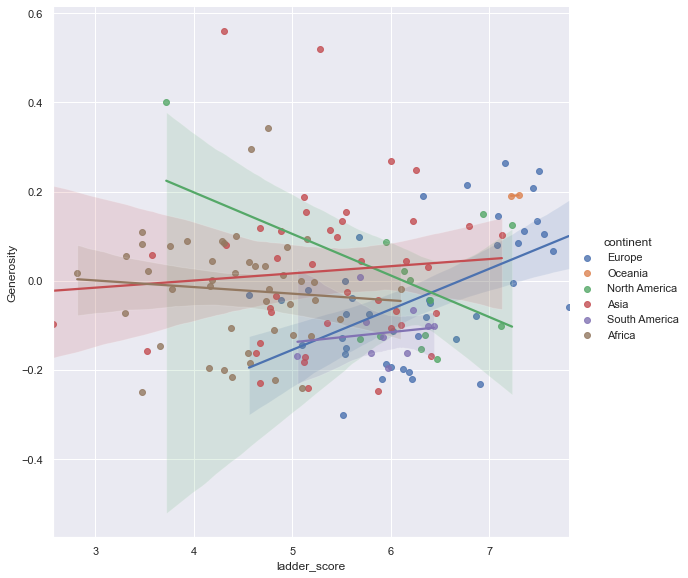

In [44]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="Generosity",hue="continent", height=8)

<AxesSubplot:ylabel='continent'>

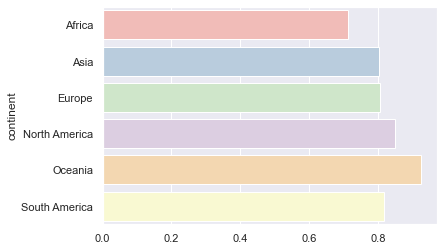

In [45]:

data=twenty_twenty_data.groupby('continent').freedom.sum()/twenty_twenty_data.groupby('continent').freedom.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")

<Figure size 864x504 with 0 Axes>

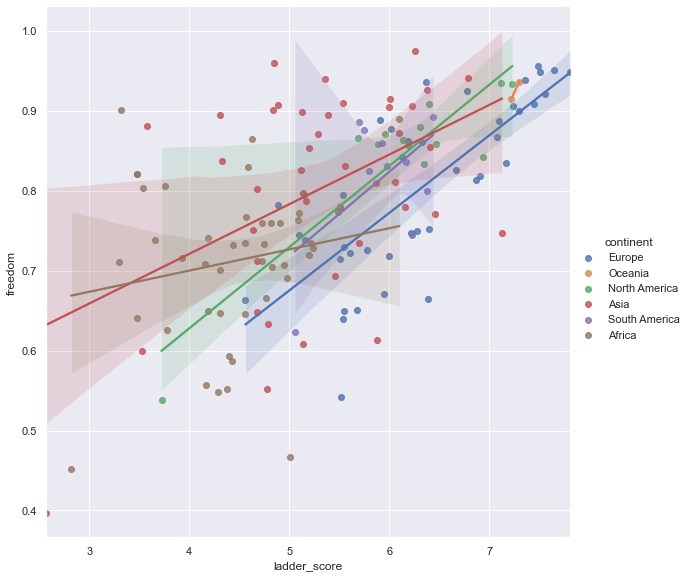

In [46]:
plt.figure(figsize=(12,7))
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="freedom",hue="continent", height=8)

In [47]:

fig = px.scatter(twenty_twenty_data, x="ladder_score",y="freedom",color="continent",trendline="ols")
fig.show()

<AxesSubplot:ylabel='continent'>

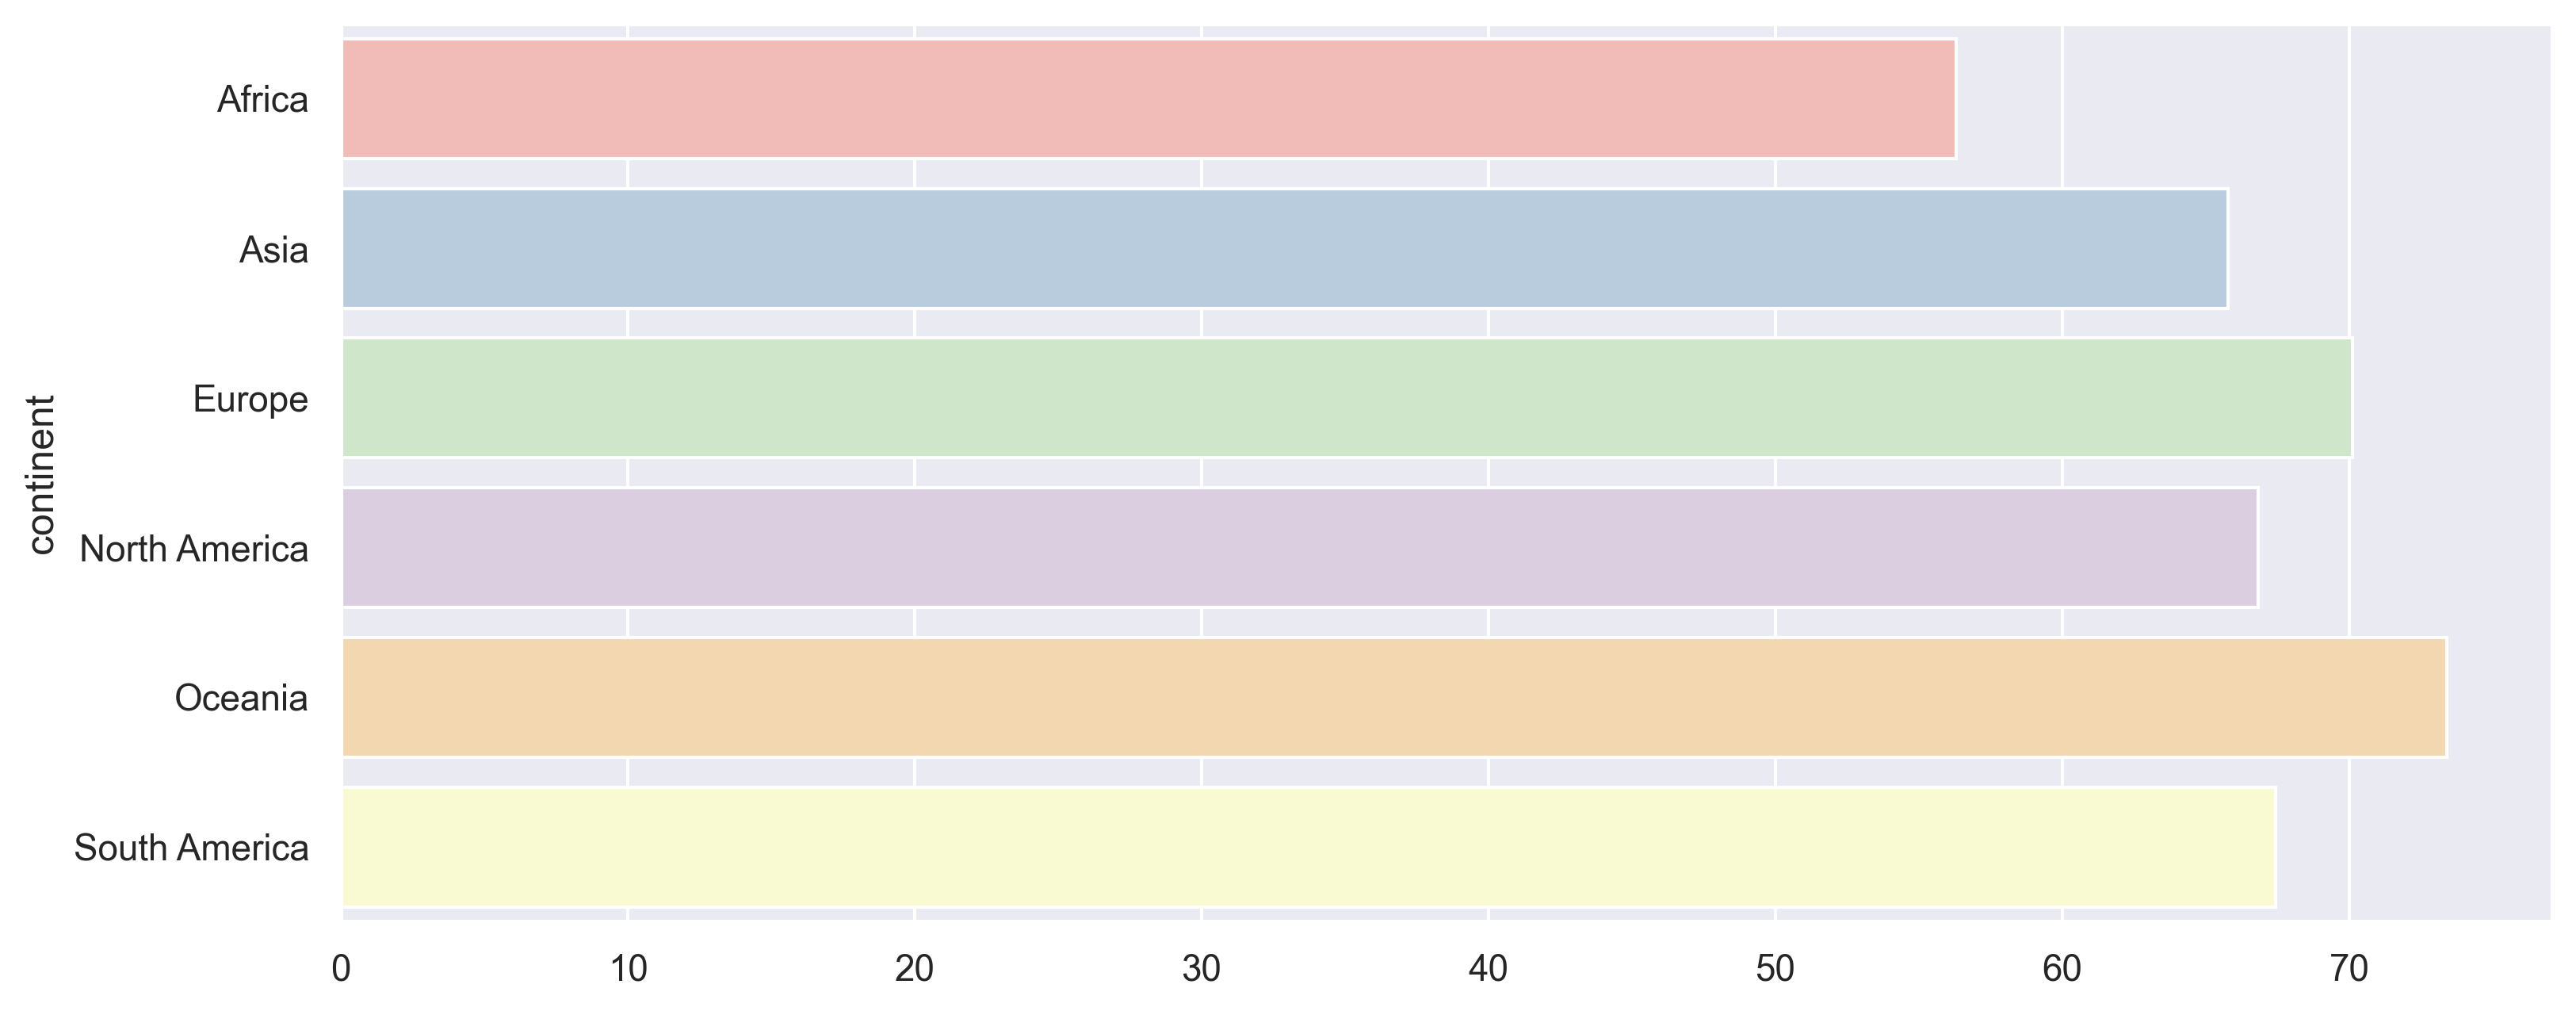

In [48]:

plt.figure(figsize=(12,5),dpi=300)
data=twenty_twenty_data.groupby('continent').healthy_life_expectancy.sum()/twenty_twenty_data.groupby('continent').healthy_life_expectancy.count()
sns.barplot(y=data.index,x=data.values,palette="Pastel1")



<Figure size 3600x2100 with 0 Axes>

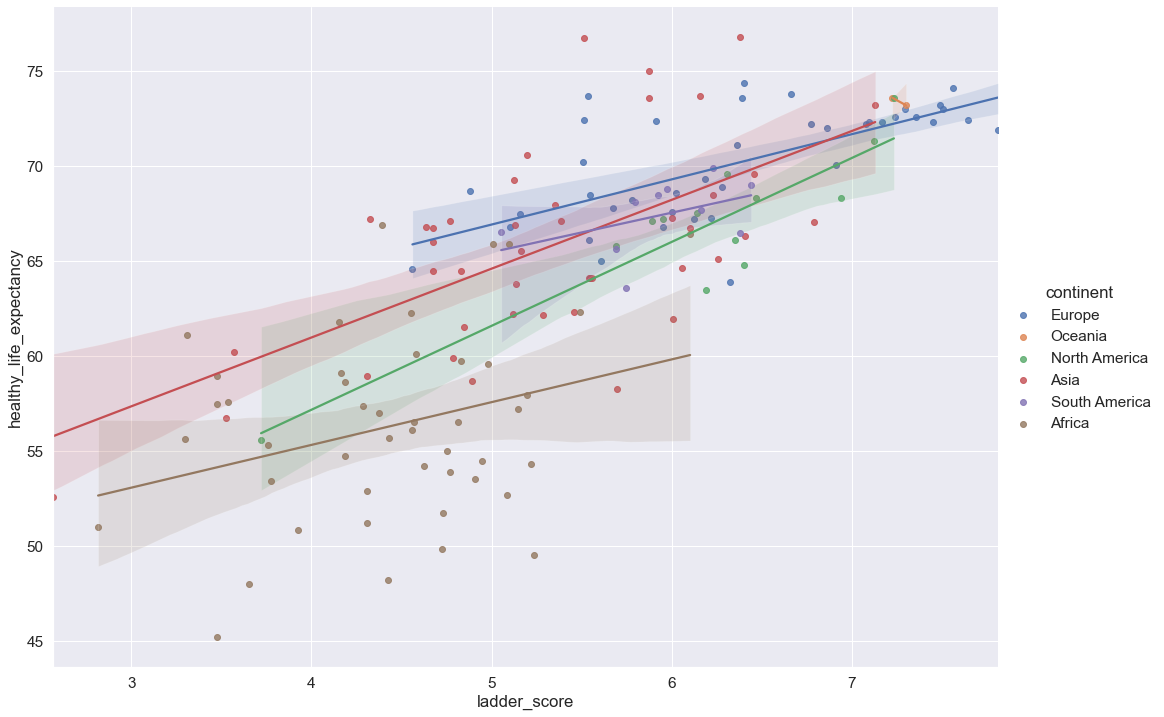

In [49]:
plt.figure(figsize=(12,7),dpi=300)
sns.set(font_scale=1.4)
sns.lmplot(data=twenty_twenty_data,x="ladder_score",y="healthy_life_expectancy",hue="continent", height=10,aspect=14/10)

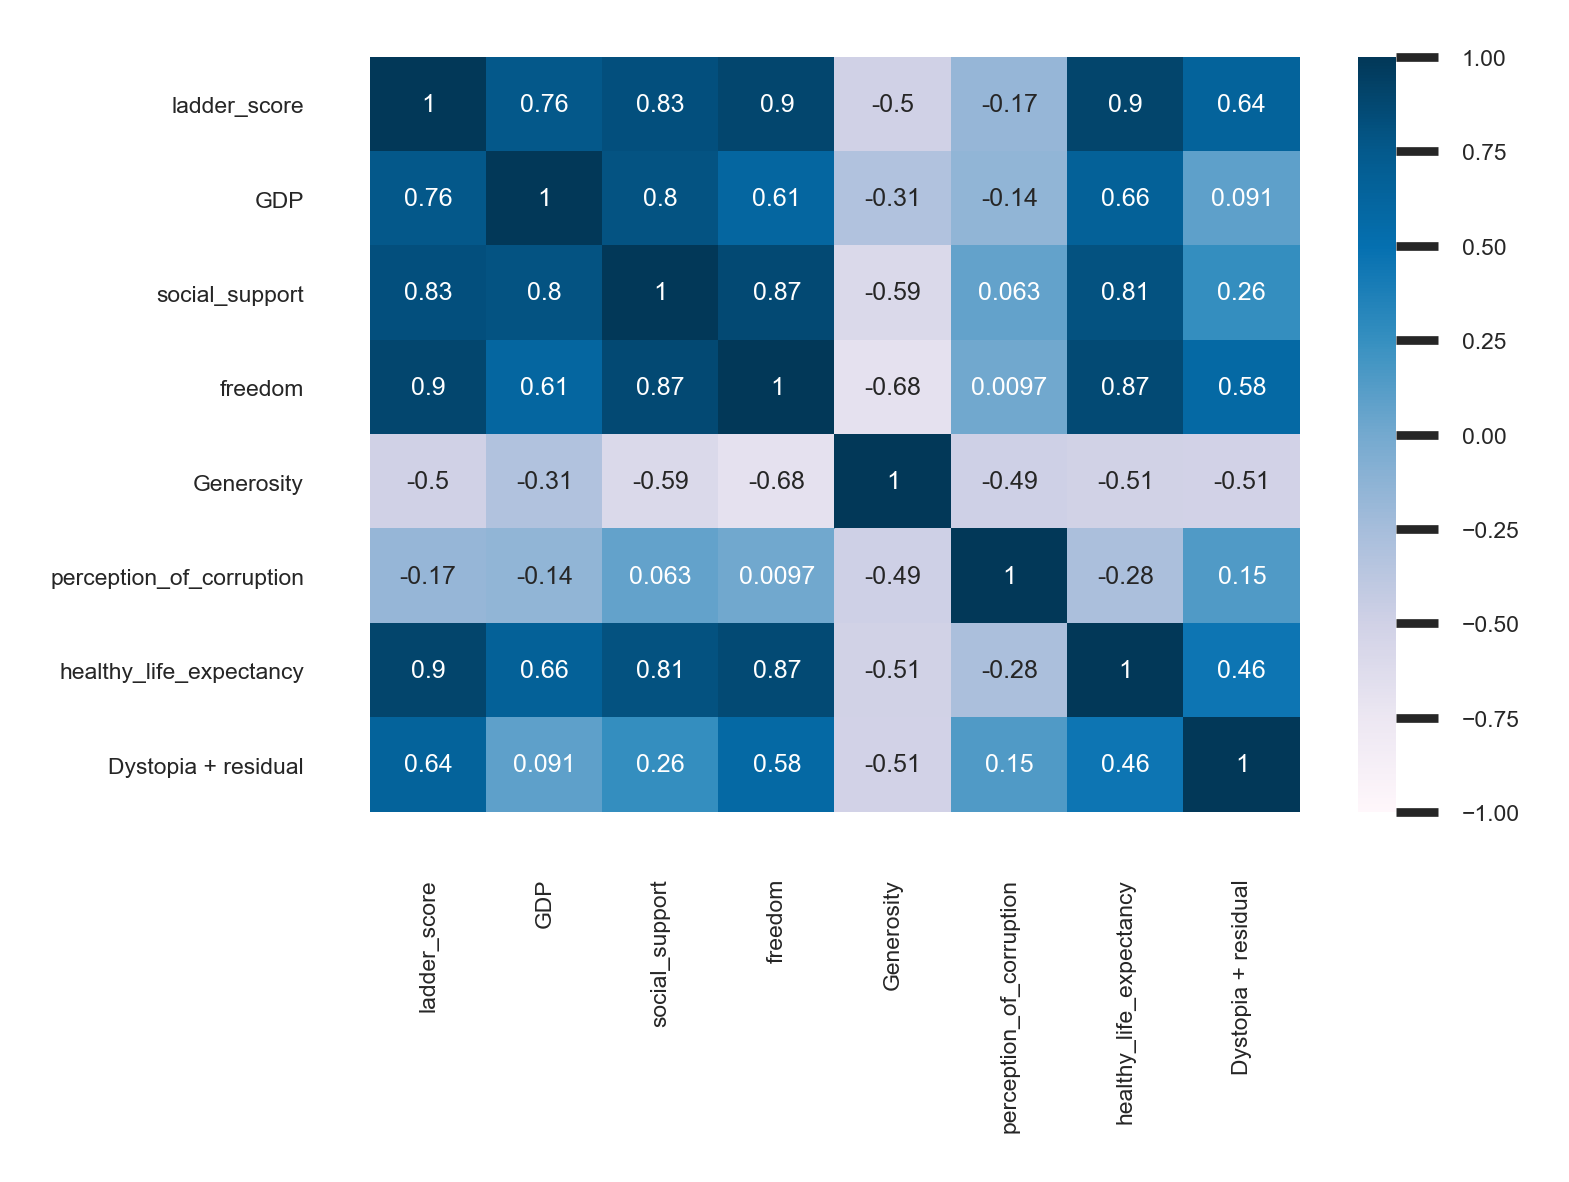

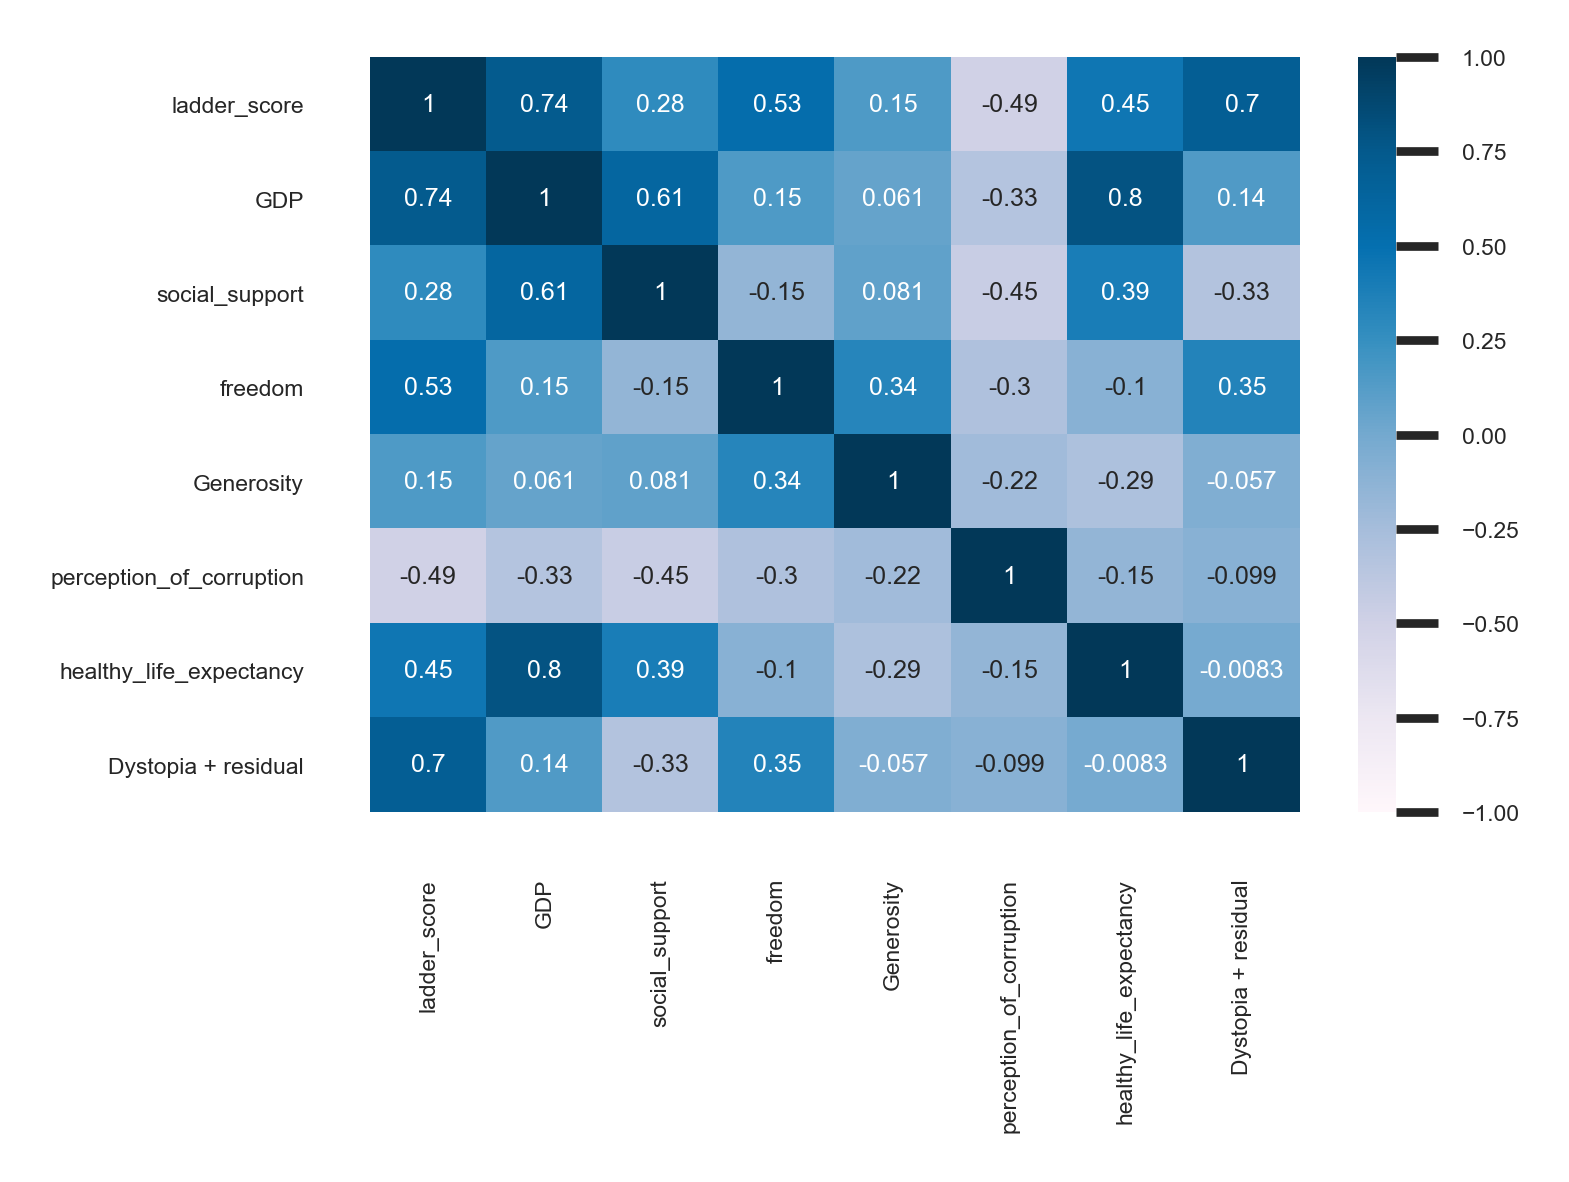

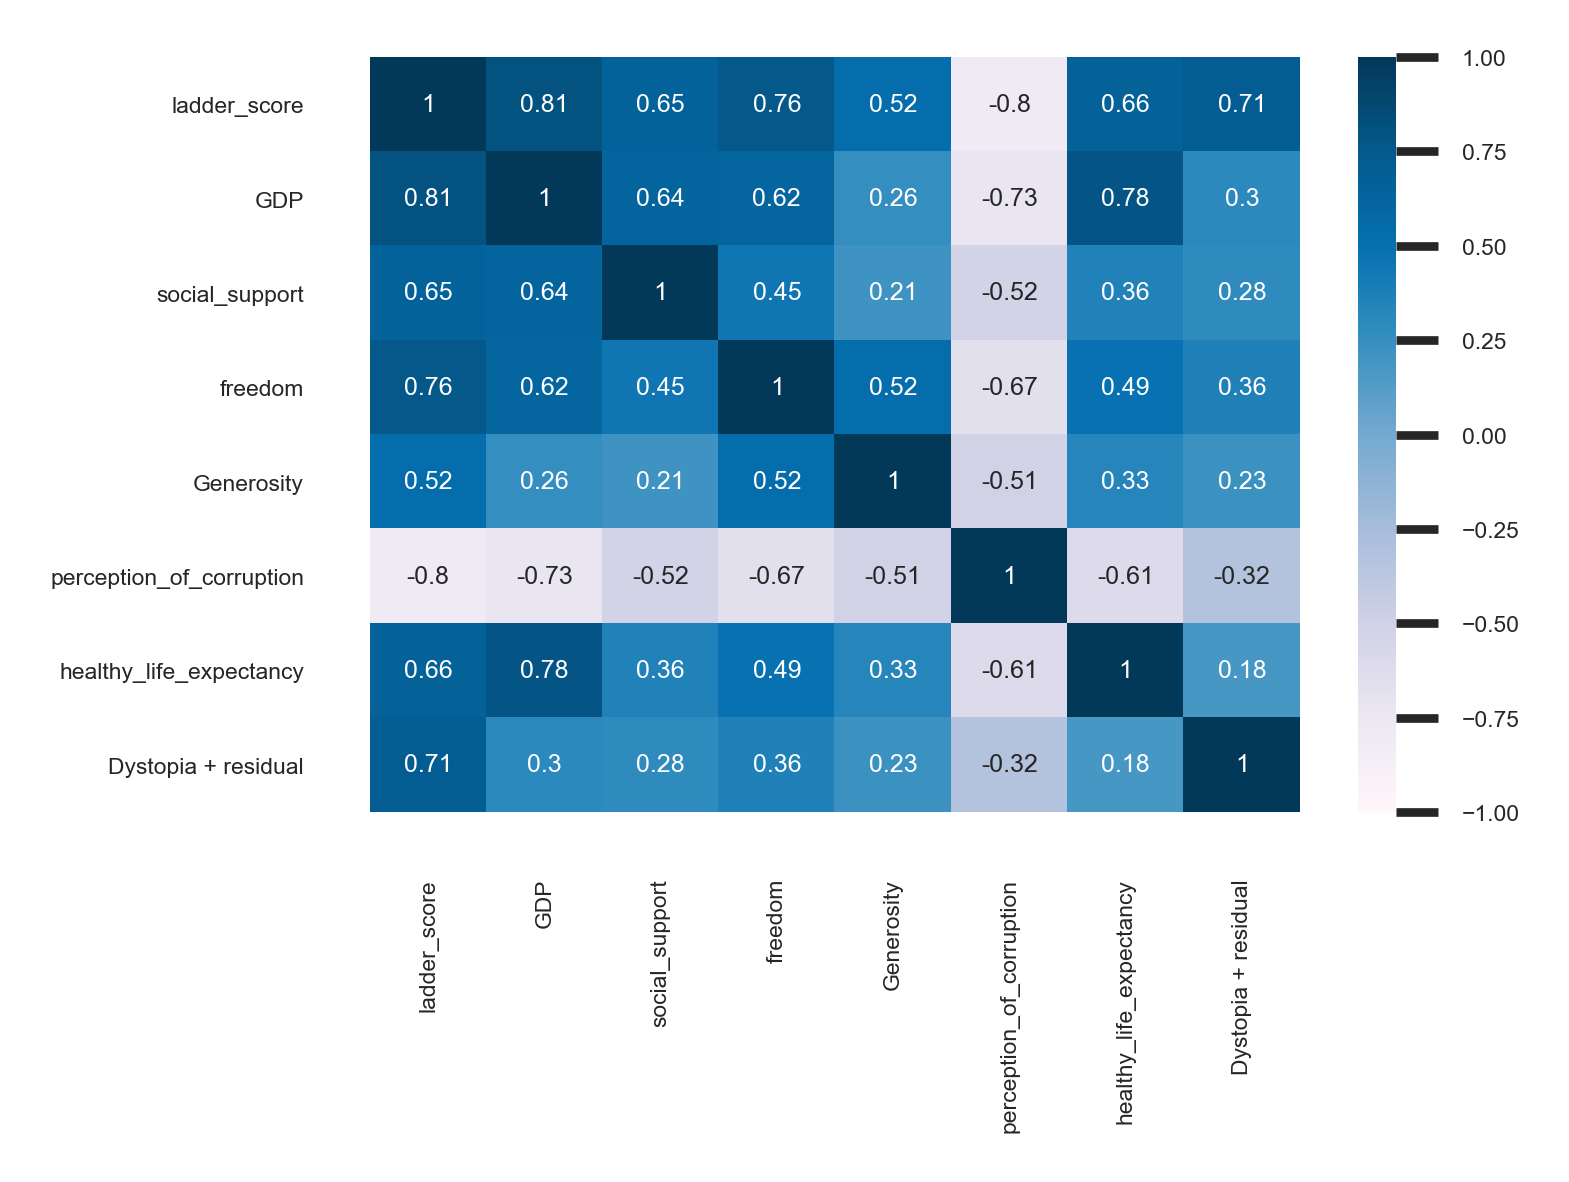

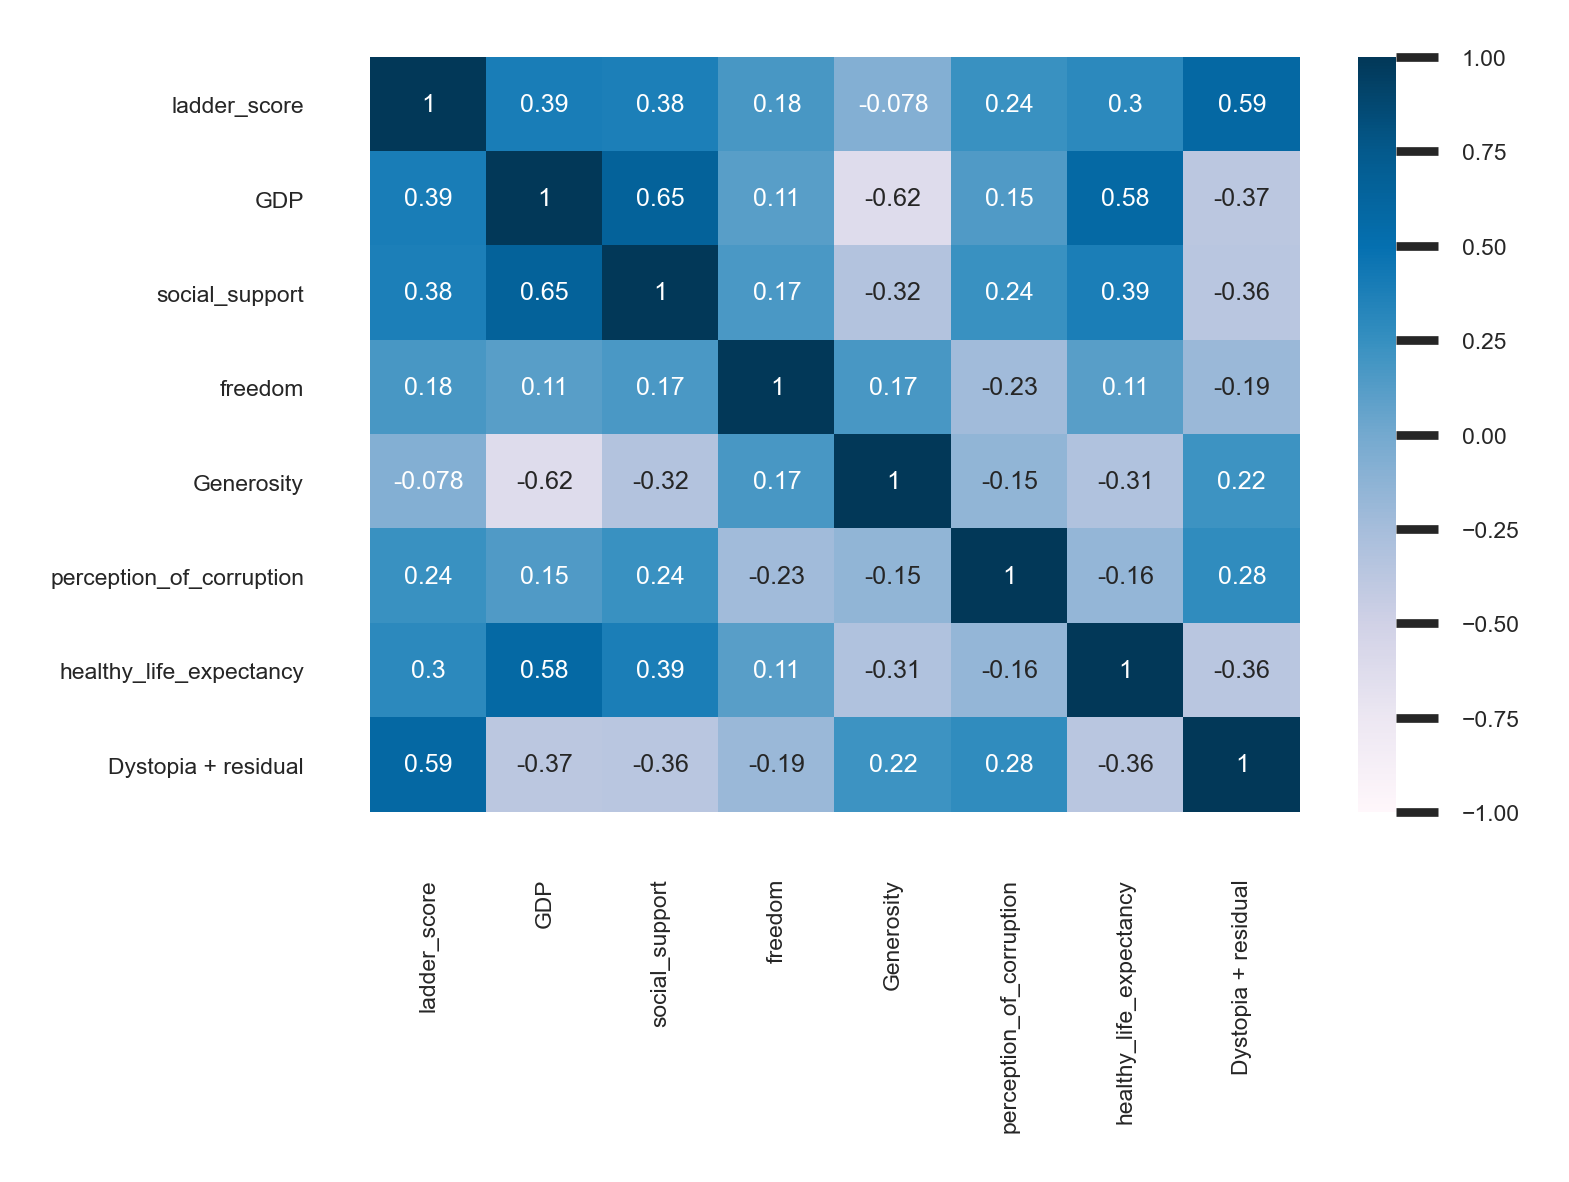

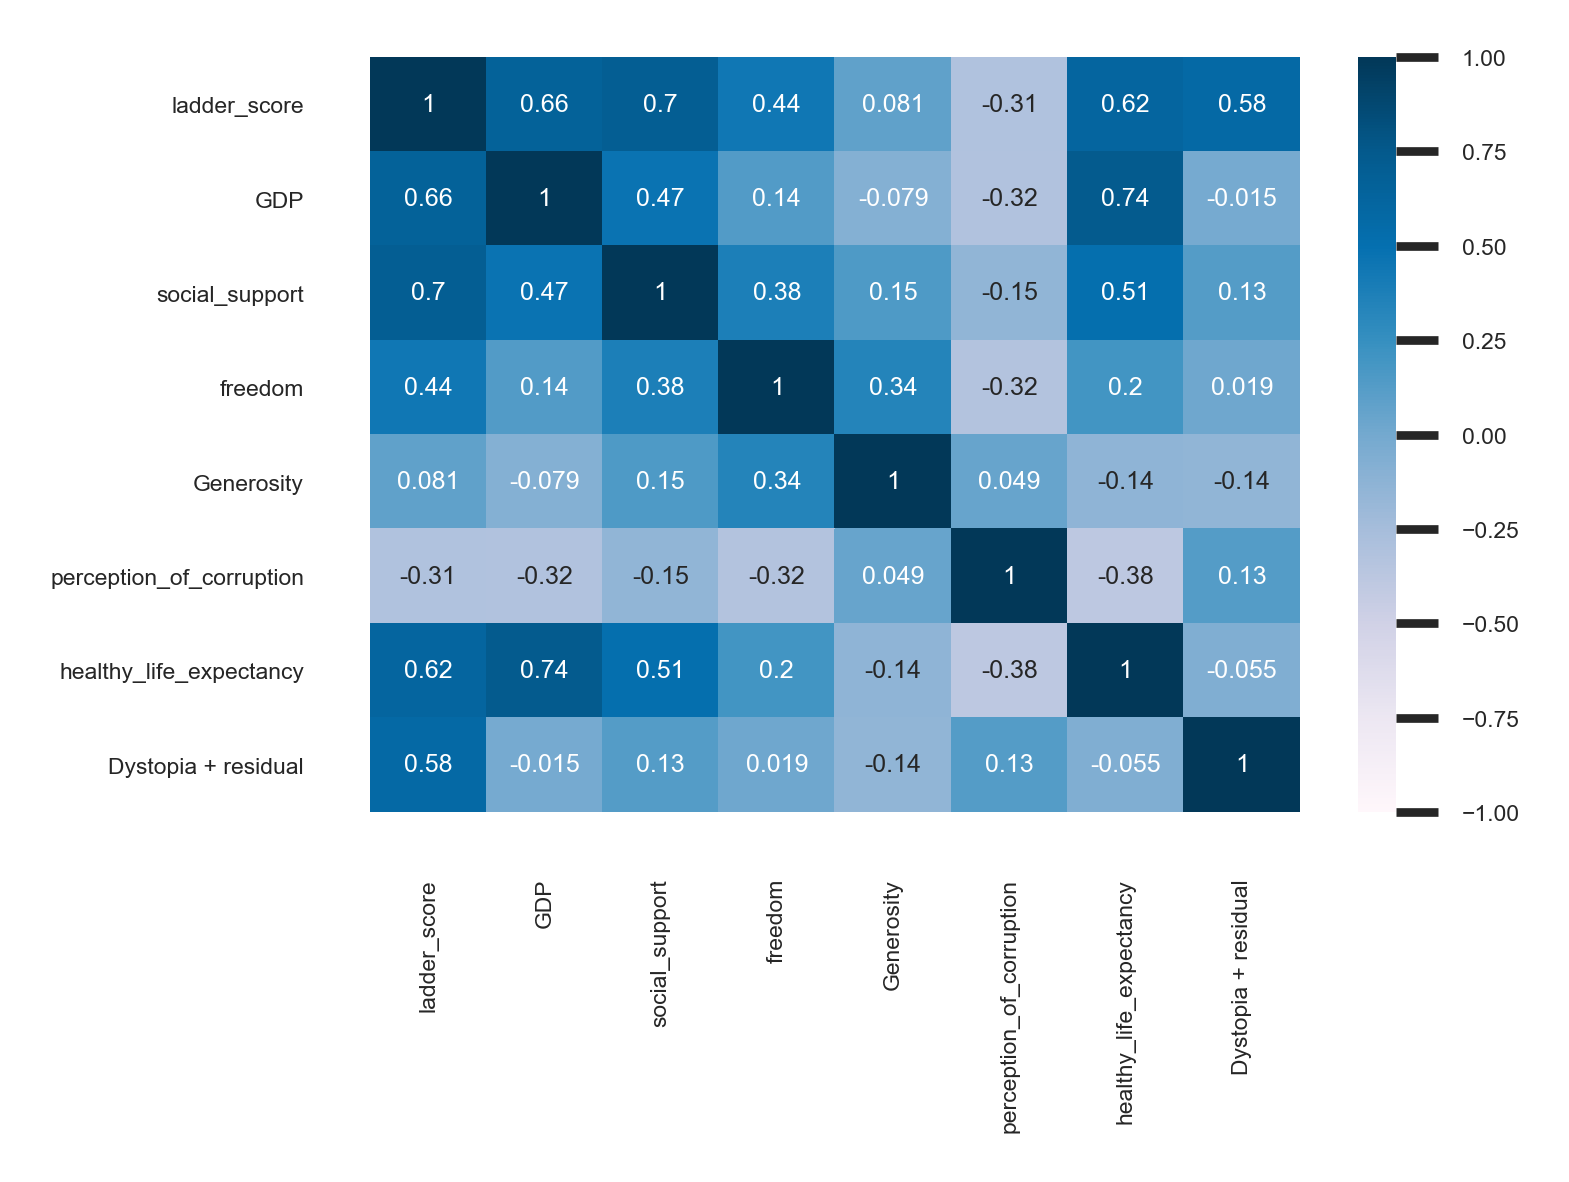

In [50]:
for i in["North America","South America","Europe","Africa","Asia"]:
    twenty_twenty_relevant_data = twenty_twenty_data.loc[twenty_twenty_data.continent==i].loc[:,["ladder_score","GDP","social_support","freedom","Generosity","perception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()
    sns.set(font_scale=0.3)
    ax = plt.subplots(figsize=(3,2),dpi=500) 
    sns.heatmap(twenty_twenty_relevant_data.corr(),vmin=-1, vmax=1, annot=True,cmap='PuBu')
    
    fig = go.Figure(data=go.Choropleth(
    locations = twenty_twenty_data.loc[twenty_twenty_data.continent==i]['code'],
    z = twenty_twenty_data.loc[twenty_twenty_data.continent==i]['ladder_score'],
    text = twenty_twenty_data.loc[twenty_twenty_data.continent==i]['country'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title = 'World Happiness Score',
    ))

    fig.update_layout(
        title_text='2020 World Happiness',
        geo=dict(
            scope=i.lower(),
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        ),
    )

    fig.show()
    #twenty_twenty_data.loc[twenty_twenty_data_gpd.continent==i].plot('ladder_score', cmap='Greens', linewidth=0.8, ax=ax,legend=True)

In [51]:

twenty_twenty_data[:].sum()

country                                       FinlandDenmarkSwitzerlandIcelandNorwayNetherla...
regional_indicator                            Western EuropeWestern EuropeWestern EuropeWest...
ladder_score                                                                            837.406
Standard error of ladder score                                                          8.19138
upperwhisker                                                                            853.461
lowerwhisker                                                                            821.351
GDP                                                                                     1422.24
social_support                                                                          123.734
healthy_life_expectancy                                                                 9860.17
freedom                                                                                 119.854
Generosity                              

<AxesSubplot:>

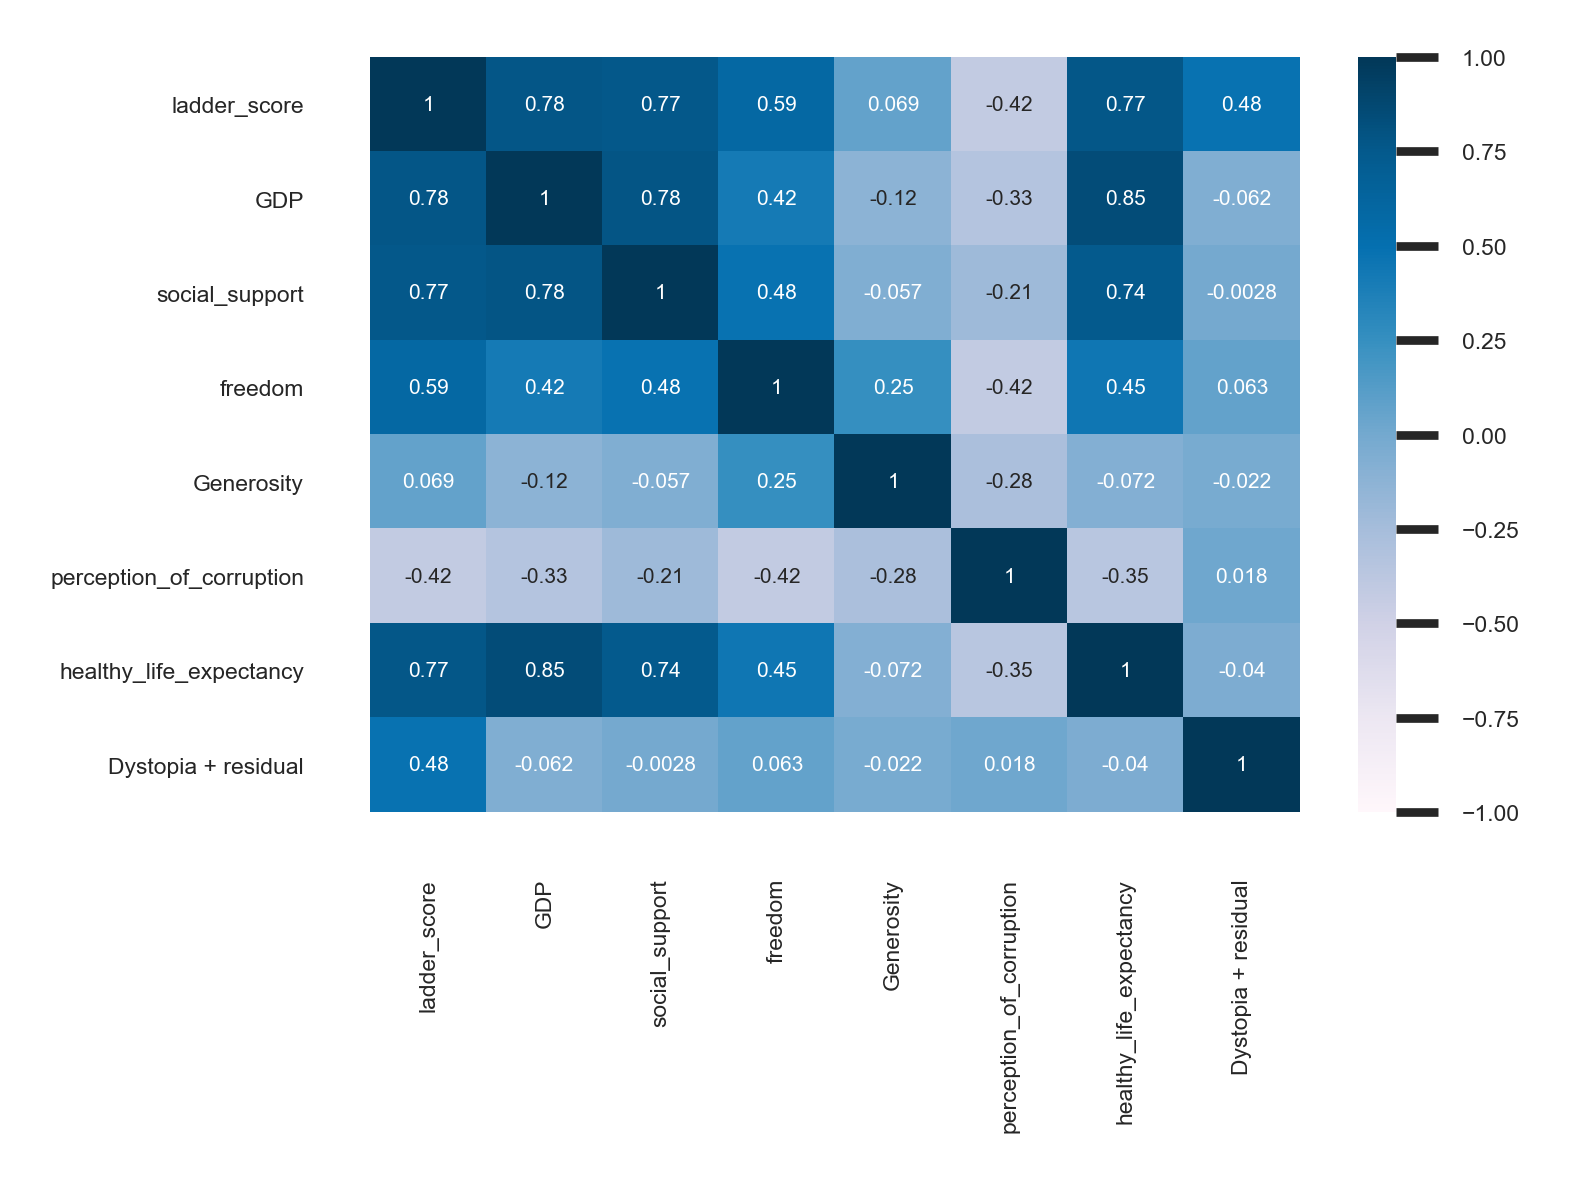

In [52]:
#plt.title("Happiness Score By Factor")
sns.set(font_scale=0.3)
fig, ax = plt.subplots(figsize=(3,2),dpi=500)
twenty_twenty_relevant_data = twenty_twenty_data.loc[:,["ladder_score","GDP","social_support","freedom","Generosity","perception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()
#twenty_twenty_relevant_data= twenty_twenty_relevant_data.set_index("ladder_score")
#sns.heatmap(data=twenty_twenty_relevant_data)
corr = twenty_twenty_relevant_data.corr()
sns.heatmap(corr,vmin=-1, vmax=1, annot=True,cmap='PuBu',label='small',annot_kws={"size": 3})

In [53]:
twenty_twenty_relevant_data = twenty_twenty_data.loc[twenty_twenty_data.continent=="Oceania"].loc[:,["ladder_score","GDP","social_support","freedom","Generosity","perception_of_corruption","healthy_life_expectancy","Dystopia + residual"]].copy()
twenty_twenty_relevant_data.corr()

,ladder_score,GDP,social_support,freedom,Generosity,perception_of_corruption,healthy_life_expectancy,Dystopia + residual
ladder_score,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
GDP,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
social_support,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
freedom,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
Generosity,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
perception_of_corruption,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
healthy_life_expectancy,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
Dystopia + residual,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0


In [54]:
twenty_twenty_data.groupby('continent').ladder_score.count()

continent
Africa           45
Asia             42
Europe           41
North America    13
Oceania           2
South America    10
Name: ladder_score, dtype: int64